In [1]:
import warnings
warnings.filterwarnings('ignore')

# Prepare the Dataset

In [2]:
dataset_name = 'SmallNORB'

In [3]:
import pickle
import numpy as np

In [4]:
with open('./data/SmallNORB_ds.pkl', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data = pickle.load(f)
    
X, y, labels = data['X'], data['y'], data['labels']

In [5]:
print('Dataset size {}'.format(X.shape))

Dataset size (97200, 32, 32, 3)


In [6]:
imgs = X
X = X.astype(np.float32)/ 255.0
print('Dataset size {}'.format(X.shape))

Dataset size (97200, 32, 32, 3)


## Dimension Reduction for plotting

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.reshape((X.shape[0], -1)))


## Plotting the original data set

In [9]:
import random
randomindexs = list()
for i in range(6000):
    randomindexs.append(random.randint(0,len(X_pca)-1))

In [10]:
from _utils.plots import plot_dataset

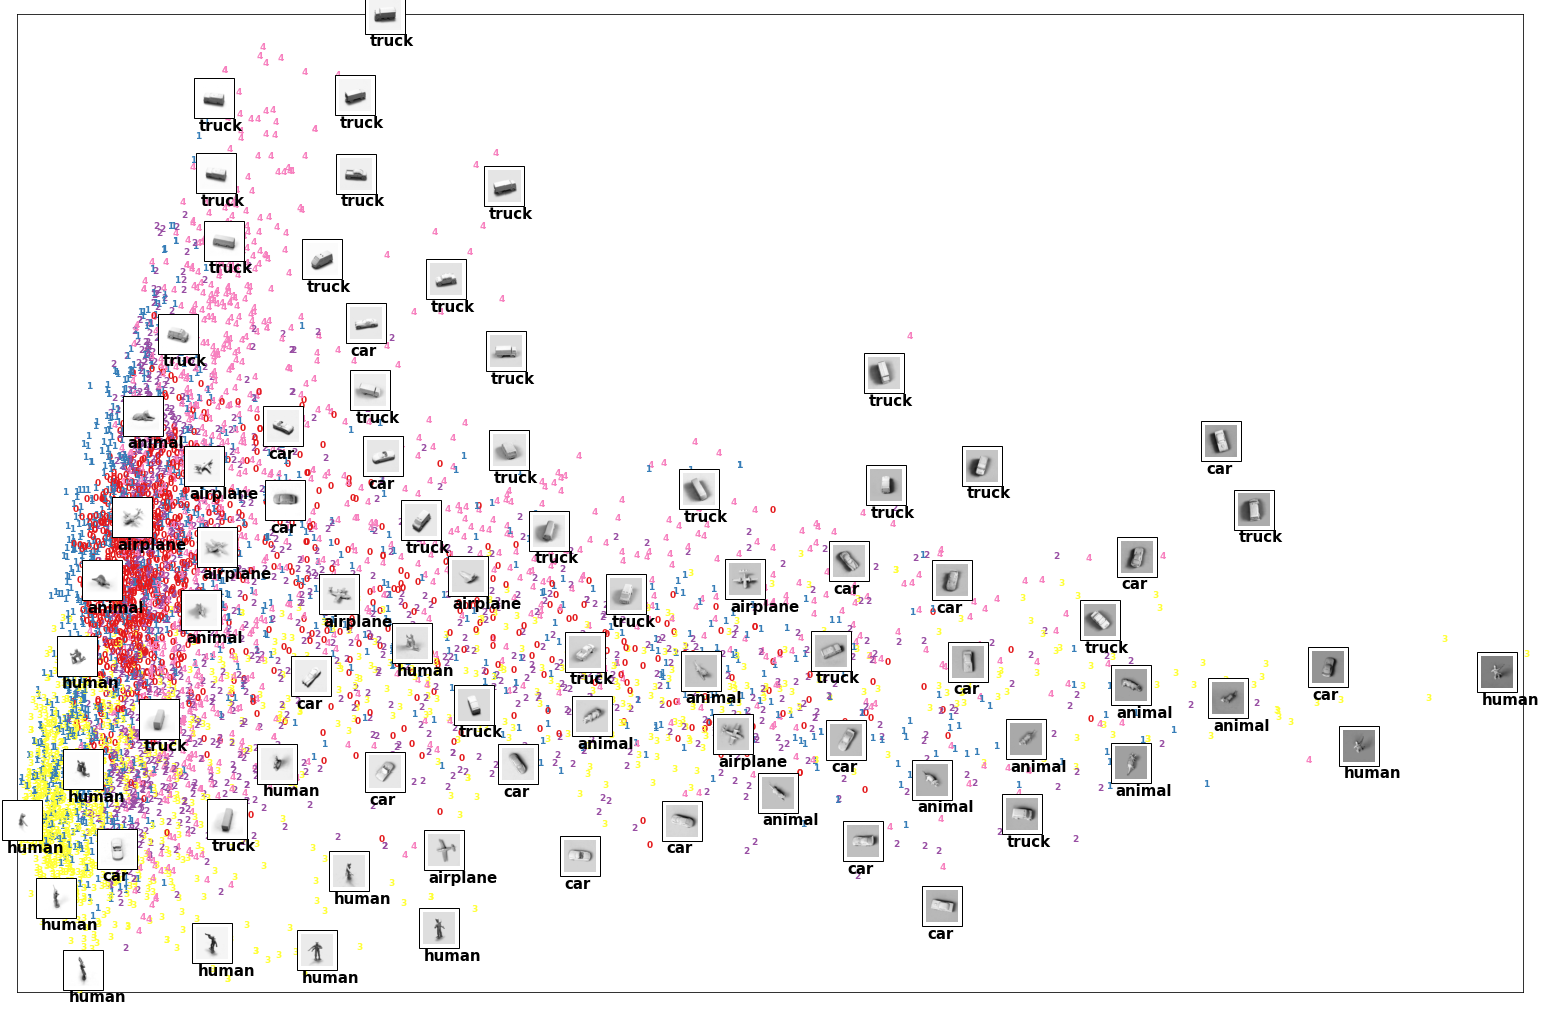

In [11]:
plot_dataset(X_pca[randomindexs], y[randomindexs],images=imgs[randomindexs], labels=labels, gray=True)

## Linear Separability Analysis

https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html

https://www.cs.waikato.ac.nz/~eibe/pubs/chains.pdf

In [12]:
#%load_ext autoreload
#%autoreload 2

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

from _utils.plots import plot_transform_hyperplanes

cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.11716666666666667
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.11816666666666667


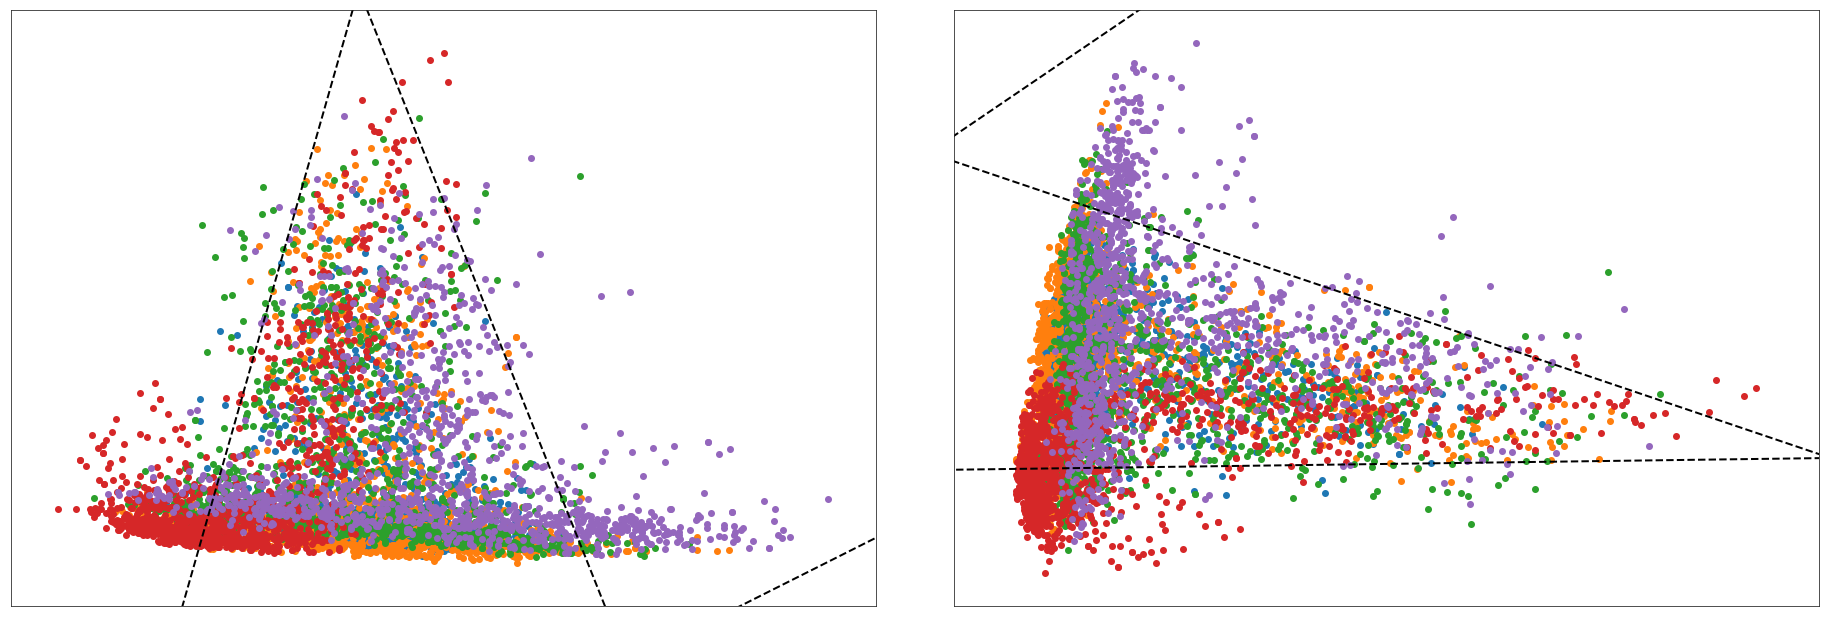

In [14]:
plot_transform_hyperplanes(X_pca[randomindexs], pd.get_dummies(y[randomindexs]).values)

# tSNE embedding transforamtion

https://lvdmaaten.github.io/tsne/

https://github.com/KlugerLab/FIt-SNE

https://github.com/spotify/annoy

http://www.fftw.org/    

In [15]:
from FIt_SNE.fast_tsne import fast_tsne

In [17]:
Z_embedded1 = fast_tsne(X.reshape((X.shape[0], -1)), 
                         learning_rate=1000, max_iter=5000,
                         n_trees=500, perplexity=100,
                         initialization=X_pca, 
                         df=1,
                         early_exag_coeff=15,  
                         late_exag_coeff=5)

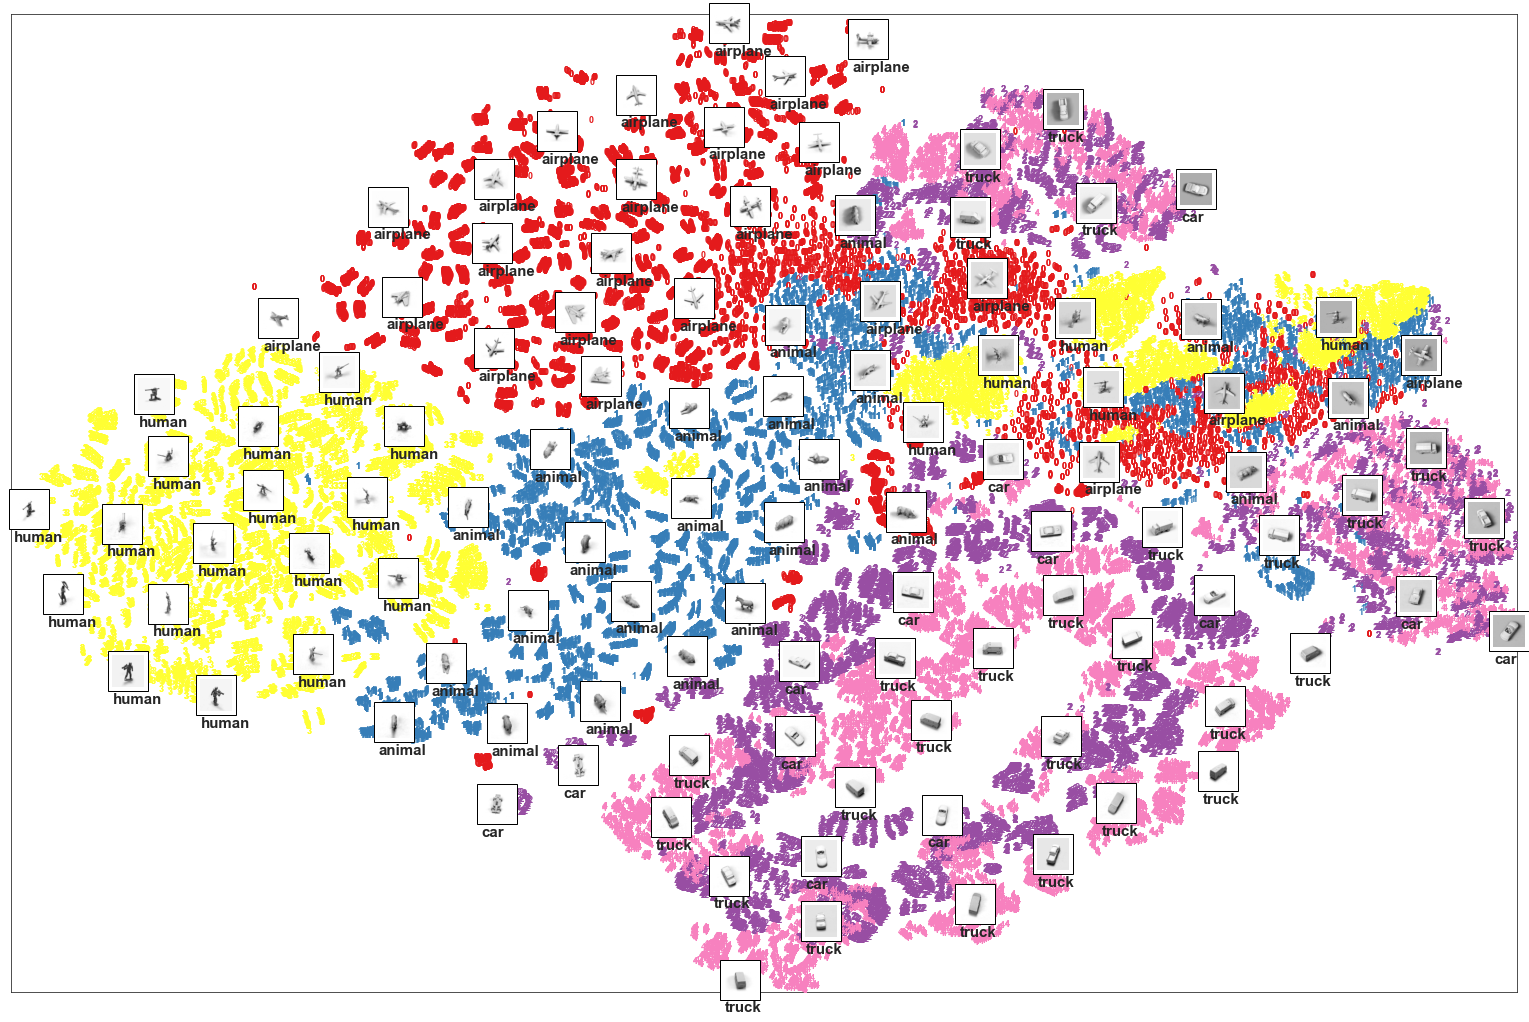

In [18]:
plot_dataset(Z_embedded1, y,images=imgs, labels=labels, gray=True)


In [19]:
Z_embedded = fast_tsne(X.reshape((X.shape[0], -1)), 
                         learning_rate=1000, max_iter=5000,
                         n_trees=500, perplexity=100,
                         initialization=X_pca, 
                         df=0.4,
                         early_exag_coeff=15,  
                         late_exag_coeff=5)

In [20]:
#Z1 = fast_tsne(X.reshape((X.shape[0], -1)), 
#                         learning_rate=1000,
#                         n_trees=100,
#                         initialization=X_pca, 
#                         df=0.4,
#                         late_exag_coeff=5)
#

#=============== t-SNE v1.1.0 ===============
#fast_tsne data_path: data.dat
#fast_tsne result_path: result.dat
#fast_tsne nthreads: 12
#Read the following parameters:
##########n 97200 by d 3072 dataset, theta 0.500000,
##########perplexity 100.000000, no_dims 2, max_iter 5000,
##########stop_lying_iter 250, mom_switch_iter 250,
##########momentum 0.500000, final_momentum 0.800000,
##########learning_rate 1000.000000, K -1, sigma -1.000000, nbody_algo 2,
##########knn_algo 1, early_exag_coeff 15.000000,
##########no_momentum_during_exag 0, n_trees 500, search_k 150000,
##########start_late_exag_iter -1, late_exag_coeff 5.000000
##########nterms 3, interval_per_integer 1.000000, min_num_intervals 50, t-dist df 0.400000
#Read the 97200 x 3072 data matrix successfully. X[0,0] = 0.929412
#Read the initialization successfully.
#Will use momentum during exaggeration phase
#Computing input similarities...
#Using perplexity, so normalizing input data (to prevent numerical problems)
#Using perplexity, not the manually set kernel width.  K (number of nearest neighbors) and sigma (bandwidth) parameters are going to be ignored.
#Using ANNOY for knn search, with parameters: n_trees 500 and search_k 150000
#Going to allocate memory. N: 97200, K: 300, N*K = 29160000
#Building Annoy tree...
#Done building tree. Beginning nearest neighbor search...
#parallel (12 threads):
#[============================================================] 100% 1602.2s
#Symmetrizing...
#Using the given initialization.
#Exaggerating Ps by 15.000000
#Input similarities computed (sparsity = 0.004527)!
#Learning embedding...
#Using FIt-SNE approximation.
#Iteration 50 (50 iterations in 3.32 seconds), cost 5.655378
#Iteration 100 (50 iterations in 3.16 seconds), cost 5.705986
#Iteration 150 (50 iterations in 3.15 seconds), cost 5.721955
#Iteration 200 (50 iterations in 3.16 seconds), cost 5.749902
#Iteration 250 (50 iterations in 3.13 seconds), cost 5.749056
#Unexaggerating Ps by 15.000000
#Iteration 300 (50 iterations in 3.40 seconds), cost 5.343873
#Iteration 350 (50 iterations in 3.17 seconds), cost 5.143425
#Iteration 400 (50 iterations in 3.18 seconds), cost 4.995044
#Iteration 450 (50 iterations in 3.18 seconds), cost 4.879410
#Iteration 500 (50 iterations in 3.18 seconds), cost 4.782785
#Iteration 550 (50 iterations in 3.29 seconds), cost 4.700770
#Iteration 600 (50 iterations in 3.18 seconds), cost 4.631131
#Iteration 650 (50 iterations in 3.17 seconds), cost 4.569414
#Iteration 700 (50 iterations in 3.26 seconds), cost 4.515996
#Iteration 750 (50 iterations in 3.38 seconds), cost 4.467645
#Iteration 800 (50 iterations in 3.62 seconds), cost 4.424310
#Iteration 850 (50 iterations in 3.75 seconds), cost 4.383275
#Iteration 900 (50 iterations in 4.01 seconds), cost 4.345924
#Iteration 950 (50 iterations in 4.14 seconds), cost 4.312285
#Iteration 1000 (50 iterations in 4.87 seconds), cost 4.278946
#Iteration 1050 (50 iterations in 5.22 seconds), cost 4.248404
#Iteration 1100 (50 iterations in 4.78 seconds), cost 4.222029
##Iteration 1150 (50 iterations in 4.80 seconds), cost 4.195552
#Iteration 1200 (50 iterations in 5.23 seconds), cost 4.169792
#Iteration 1250 (50 iterations in 5.65 seconds), cost 4.147191
#Iteration 1300 (50 iterations in 6.05 seconds), cost 4.126602
#Iteration 1350 (50 iterations in 6.00 seconds), cost 4.103229
#Iteration 1400 (50 iterations in 6.27 seconds), cost 4.084647
#Iteration 1450 (50 iterations in 6.59 seconds), cost 4.063407
#Iteration 1500 (50 iterations in 6.90 seconds), cost 4.046326
#Iteration 1550 (50 iterations in 7.45 seconds), cost 4.029740
#Iteration 1600 (50 iterations in 7.57 seconds), cost 4.012363
#Iteration 1650 (50 iterations in 8.15 seconds), cost 3.995972
#Iteration 1700 (50 iterations in 8.48 seconds), cost 3.980640
#Iteration 1750 (50 iterations in 9.62 seconds), cost 3.966563
#Iteration 1800 (50 iterations in 9.51 seconds), cost 3.950705
#Iteration 1850 (50 iterations in 9.67 seconds), cost 3.938049
#Iteration 1900 (50 iterations in 9.75 seconds), cost 3.924944
#Iteration 1950 (50 iterations in 10.05 seconds), cost 3.913985
#Iteration 2000 (50 iterations in 12.00 seconds), cost 3.901596
#Iteration 2050 (50 iterations in 12.13 seconds), cost 3.889297
#Iteration 2100 (50 iterations in 11.75 seconds), cost 3.877774
#Iteration 2150 (50 iterations in 11.75 seconds), cost 3.866807
#Iteration 2200 (50 iterations in 11.76 seconds), cost 3.856828
#Iteration 2250 (50 iterations in 20.15 seconds), cost 3.847071
#Iteration 2300 (50 iterations in 22.48 seconds), cost 3.840632
#Iteration 2350 (50 iterations in 22.64 seconds), cost 3.833409
#Iteration 2400 (50 iterations in 23.71 seconds), cost 3.828703
#Iteration 2450 (50 iterations in 26.75 seconds), cost 3.824590
#Iteration 2500 (50 iterations in 28.70 seconds), cost 3.819930
#Iteration 2550 (50 iterations in 24.64 seconds), cost 3.817515
#Iteration 2600 (50 iterations in 23.33 seconds), cost 3.813618
#Iteration 2650 (50 iterations in 28.04 seconds), cost 3.811987
#Iteration 2700 (50 iterations in 27.60 seconds), cost 3.809143
#Iteration 2750 (50 iterations in 28.14 seconds), cost 3.806323
#Iteration 2800 (50 iterations in 26.45 seconds), cost 3.805333
#Iteration 2850 (50 iterations in 31.02 seconds), cost 3.803506
#Iteration 2900 (50 iterations in 32.23 seconds), cost 3.801229
#Iteration 2950 (50 iterations in 28.89 seconds), cost 3.798978
#Iteration 3000 (50 iterations in 24.85 seconds), cost 3.795676
#Iteration 3050 (50 iterations in 38.99 seconds), cost 3.794659
#Iteration 3100 (50 iterations in 28.50 seconds), cost 3.794369
#Iteration 3150 (50 iterations in 41.59 seconds), cost 3.792284
#Iteration 3200 (50 iterations in 34.96 seconds), cost 3.790281
#Iteration 3250 (50 iterations in 42.25 seconds), cost 3.787419
#Iteration 3300 (50 iterations in 36.90 seconds), cost 3.786559
#Iteration 3350 (50 iterations in 33.81 seconds), cost 3.784973
#Iteration 3400 (50 iterations in 34.00 seconds), cost 3.783641
#Iteration 3450 (50 iterations in 38.24 seconds), cost 3.781496
#Iteration 3500 (50 iterations in 38.08 seconds), cost 3.779283
#Iteration 3550 (50 iterations in 39.48 seconds), cost 3.778538
#Iteration 3600 (50 iterations in 47.84 seconds), cost 3.777063
#Iteration 3650 (50 iterations in 41.56 seconds), cost 3.774717
#Iteration 3700 (50 iterations in 41.90 seconds), cost 3.772744
#Iteration 3750 (50 iterations in 37.46 seconds), cost 3.770958
#Iteration 3800 (50 iterations in 49.22 seconds), cost 3.768648
#Iteration 3850 (50 iterations in 51.89 seconds), cost 3.767105
#Iteration 3900 (50 iterations in 37.18 seconds), cost 3.767052
#Iteration 3950 (50 iterations in 49.17 seconds), cost 3.764222
#Iteration 4000 (50 iterations in 44.53 seconds), cost 3.762455
#Iteration 4050 (50 iterations in 34.37 seconds), cost 3.760856
#Iteration 4100 (50 iterations in 56.34 seconds), cost 3.760928
#Iteration 4150 (50 iterations in 51.34 seconds), cost 3.759477
#Iteration 4200 (50 iterations in 54.79 seconds), cost 3.756146
#Iteration 4250 (50 iterations in 46.80 seconds), cost 3.757320
#Iteration 4300 (50 iterations in 53.64 seconds), cost 3.751131
#Iteration 4350 (50 iterations in 50.00 seconds), cost 3.749571
#Iteration 4400 (50 iterations in 39.14 seconds), cost 3.751020
#Iteration 4450 (50 iterations in 51.12 seconds), cost 3.747317
#Iteration 4500 (50 iterations in 40.26 seconds), cost 3.746268
#Iteration 4550 (50 iterations in 52.45 seconds), cost 3.744485
#Iteration 4600 (50 iterations in 58.51 seconds), cost 3.741454
#Iteration 4650 (50 iterations in 43.96 seconds), cost 3.740870
#Iteration 4700 (50 iterations in 51.94 seconds), cost 3.739527
#Iteration 4750 (50 iterations in 49.16 seconds), cost 3.737500
#Iteration 4800 (50 iterations in 42.17 seconds), cost 3.737327
#Iteration 4850 (50 iterations in 78.01 seconds), cost 3.735624
#Iteration 4900 (50 iterations in 74.13 seconds), cost 3.732181
#Iteration 4950 (50 iterations in 45.61 seconds), cost 3.730498
#Iteration 5000 (50 iterations in 56.60 seconds), cost 3.729486
#Wrote the 97200 x 2 data matrix successfully.
#Done.

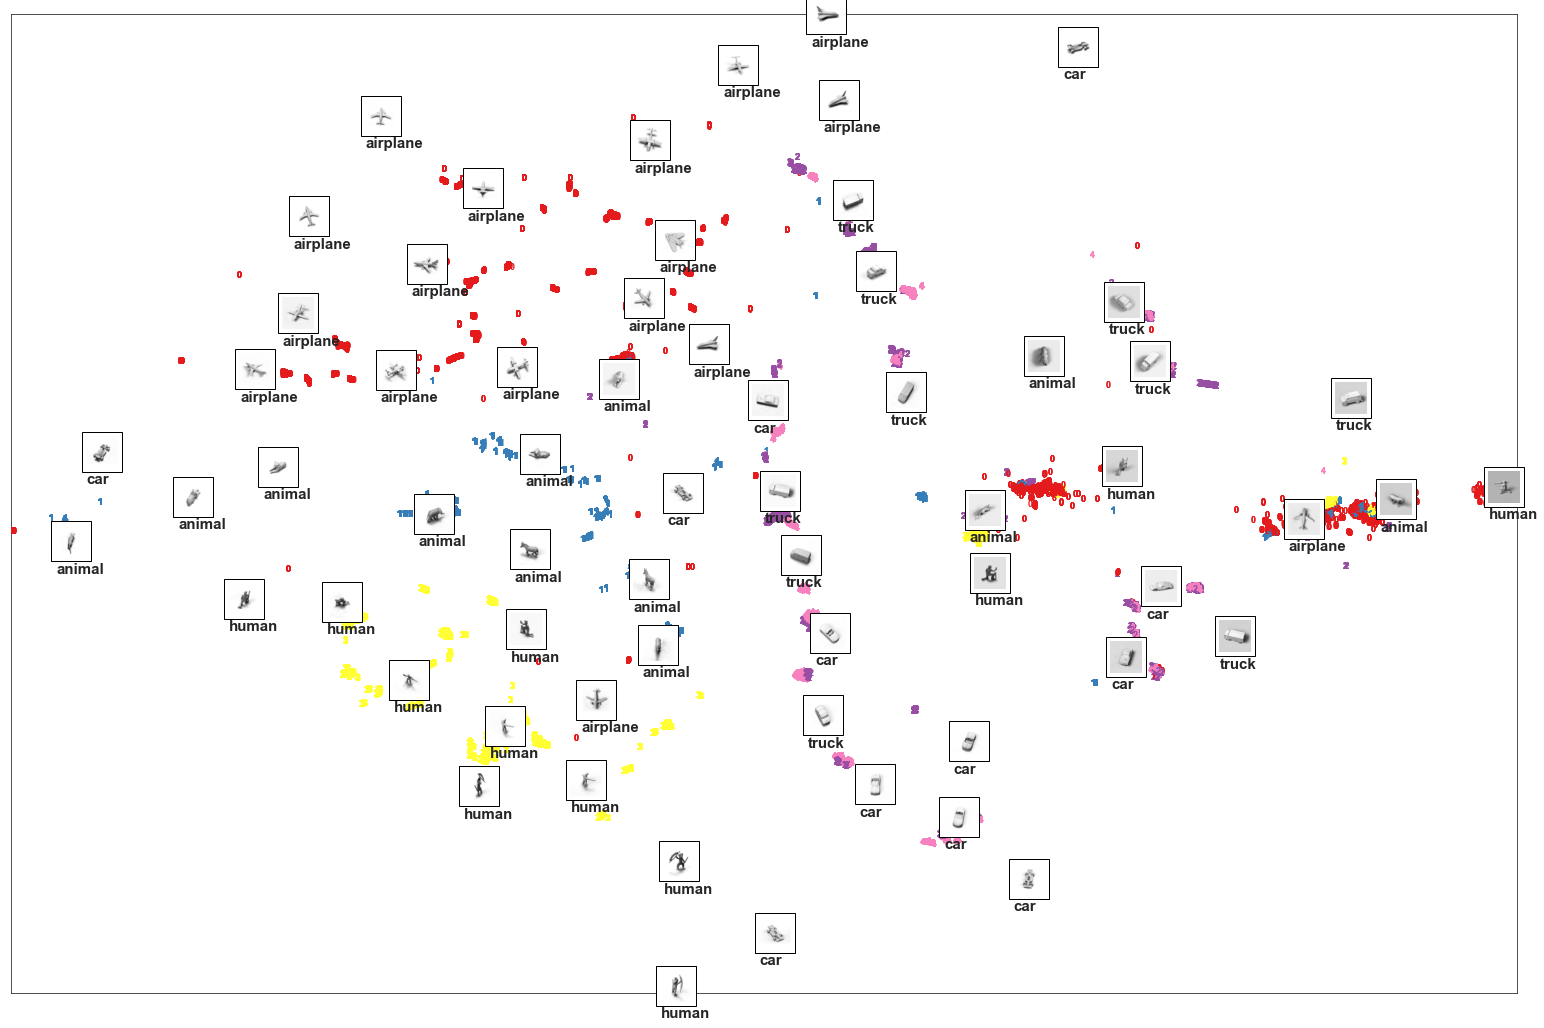

In [21]:
plot_dataset(Z_embedded, y,images=imgs, labels=labels, gray=True)

https://en.wikipedia.org/wiki/Accuracy_and_precision

https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score

https://kite.com/python/docs/sklearn.utils.linear_assignment_.linear_assignment

cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.19433333333333333
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.19533333333333333


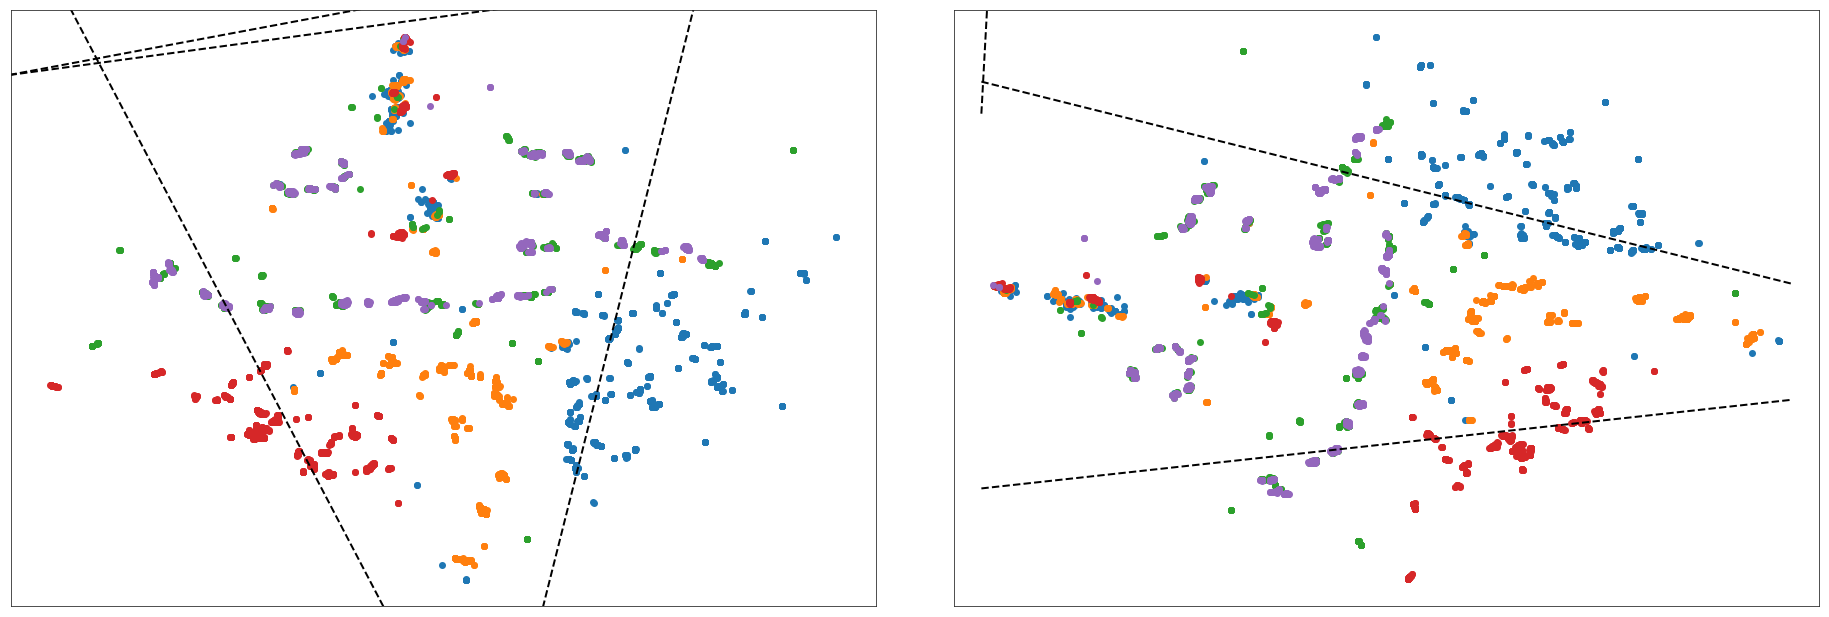

In [22]:
plot_transform_hyperplanes(Z_embedded[randomindexs], pd.get_dummies(y[randomindexs]).values)

In [23]:
from _utils.evaluate import evaluate_clustering 

# Clustering The Z-space

In [24]:
n_clusters = len(np.unique(y[randomindexs]))

In [25]:
# estimate bandwidth for mean shift
from sklearn import cluster, mixture
import hdbscan

from sklearn.neighbors import kneighbors_graph
# connectivity matrix for structured Ward
connectivity = kneighbors_graph(Z_embedded, n_neighbors=n_clusters, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
two_means = cluster.MiniBatchKMeans(n_clusters=n_clusters)
ward = cluster.AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=connectivity)
spectral = cluster.SpectralClustering(n_clusters=n_clusters, eigen_solver='arpack', affinity="nearest_neighbors")
dbscan = cluster.DBSCAN(eps=0.2)
affinity_propagation = cluster.AffinityPropagation()
birch = cluster.Birch(n_clusters=n_clusters)
gmm = mixture.GaussianMixture(n_components=n_clusters, covariance_type='full')
hdbscan_ = hdbscan.HDBSCAN(min_cluster_size=n_clusters, gen_min_span_tree=False)

clustering_algorithms = (
    ('MiniBatchKMeans', two_means),
    ('SpectralClustering', spectral),
    ('Ward', ward),
    ('Birch', birch),
    ('GaussianMixture', gmm),
    ('DBSCAN', dbscan),
    ('HDBSCAN', hdbscan_)
)


## MiniBatch KMeans

In [26]:
import time
for name, algorithm in [clustering_algorithms[0]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting MiniBatchKMeans


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.5118209876543209
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.5117489711934157


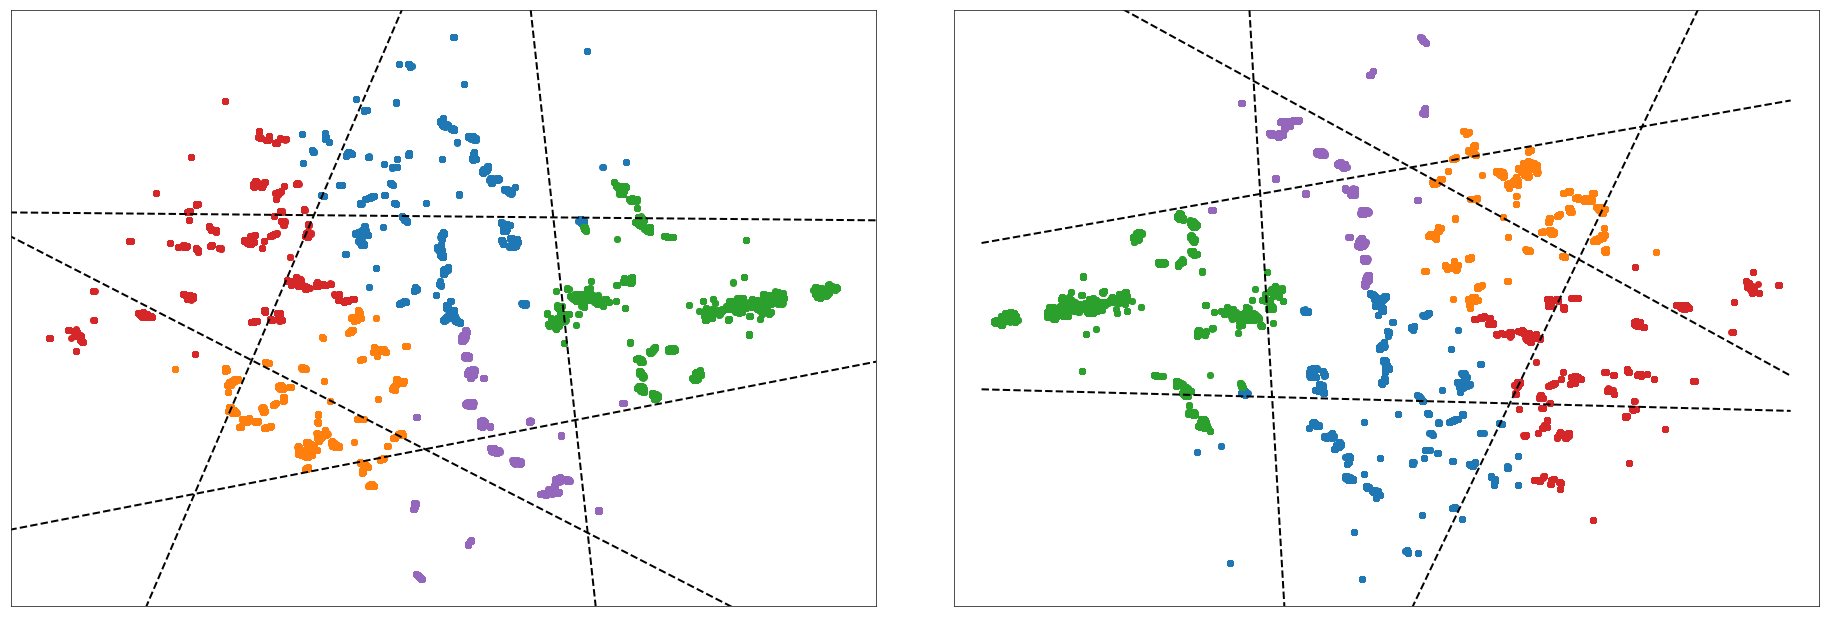

In [27]:
for name, algorithm in [clustering_algorithms[0]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)    

### Clustering Metrics

In [28]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by MiniBatchKMeans for n_clusters 5
n_clusters orignial 5
n_clusters detected 5
n unclustered points 0 out of 97200
Clustering using MiniBatchKMeans, time elapesd 0.16512751579284668
Clustering Accuracy 0.415
Clustering purity 0.4311625514403292
Clustering homogeneity 0.3104780941823767
Clustering adjusted_rand_score 0.196407439424049
Clustering adjusted_mutual_info_score 0.3104428288380833
Clustering completeness_score 0.3155408950614507
Clustering v_measure_score 0.3129890224372184


## Spectral Clustering

In [29]:
import time
for name, algorithm in [clustering_algorithms[1]]:
    t0 = time.time()
    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting SpectralClustering


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.3874691358024691
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.3874691358024691


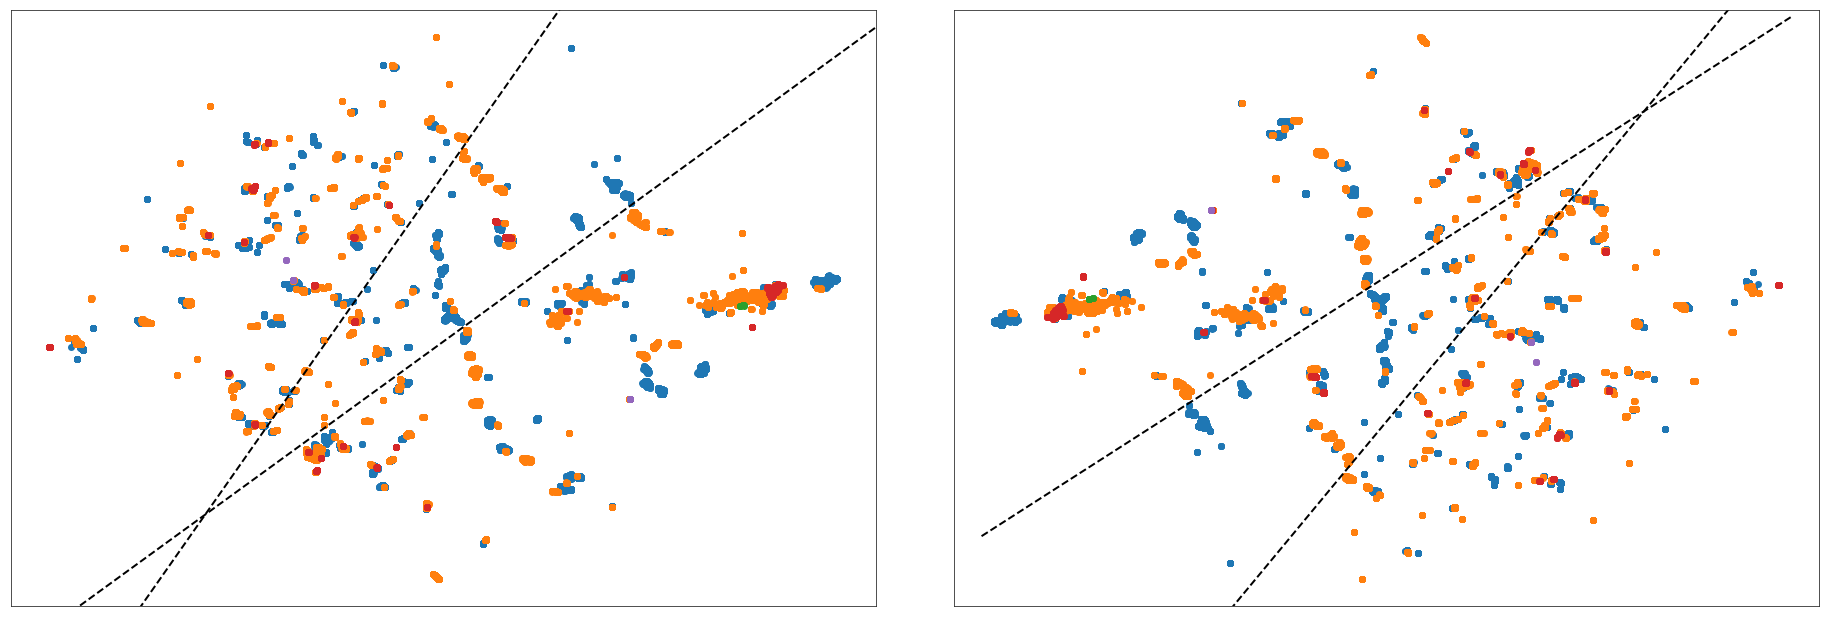

In [30]:
for name, algorithm in [clustering_algorithms[1]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)    

### Clustering Metrics

In [31]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by SpectralClustering for n_clusters 5
n_clusters orignial 5
n_clusters detected 5
n unclustered points 0 out of 97200
Clustering using SpectralClustering, time elapesd 432.58033657073975
Clustering Accuracy 0.2411522633744856
Clustering purity 0.2426954732510288
Clustering homogeneity 0.008528661251813315
Clustering adjusted_rand_score 0.0074484600979347155
Clustering adjusted_mutual_info_score 0.008475381943341652
Clustering completeness_score 0.017102675190945896
Clustering v_measure_score 0.011381608877798105


## Ward

In [32]:
import time
for name, algorithm in [clustering_algorithms[2]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting Ward


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.5566460905349794
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.556440329218107


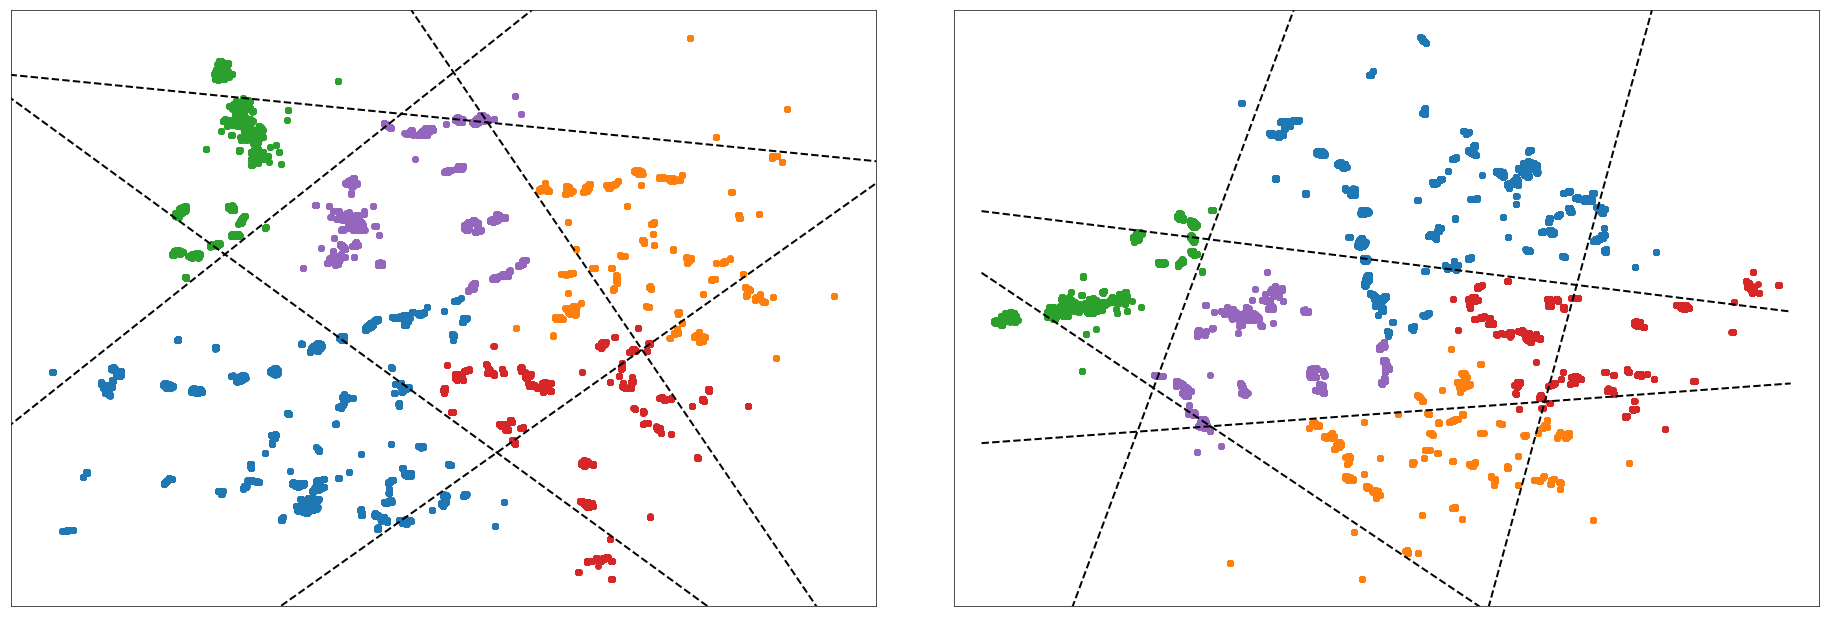

In [33]:
for name, algorithm in [clustering_algorithms[2]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)    

### Clustering Metrics

In [34]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by Ward for n_clusters 5
n_clusters orignial 5
n_clusters detected 5
n unclustered points 0 out of 97200
Clustering using Ward, time elapesd 139.24196910858154
Clustering Accuracy 0.43824074074074076
Clustering purity 0.43996913580246916
Clustering homogeneity 0.22203405201915963
Clustering adjusted_rand_score 0.16456438566643378
Clustering adjusted_mutual_info_score 0.22199426314502066
Clustering completeness_score 0.22973914783370605
Clustering v_measure_score 0.22582089383593137


## Birch

In [35]:
import time
for name, algorithm in [clustering_algorithms[3]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting Birch


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.4462448559670782
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.44626543209876546


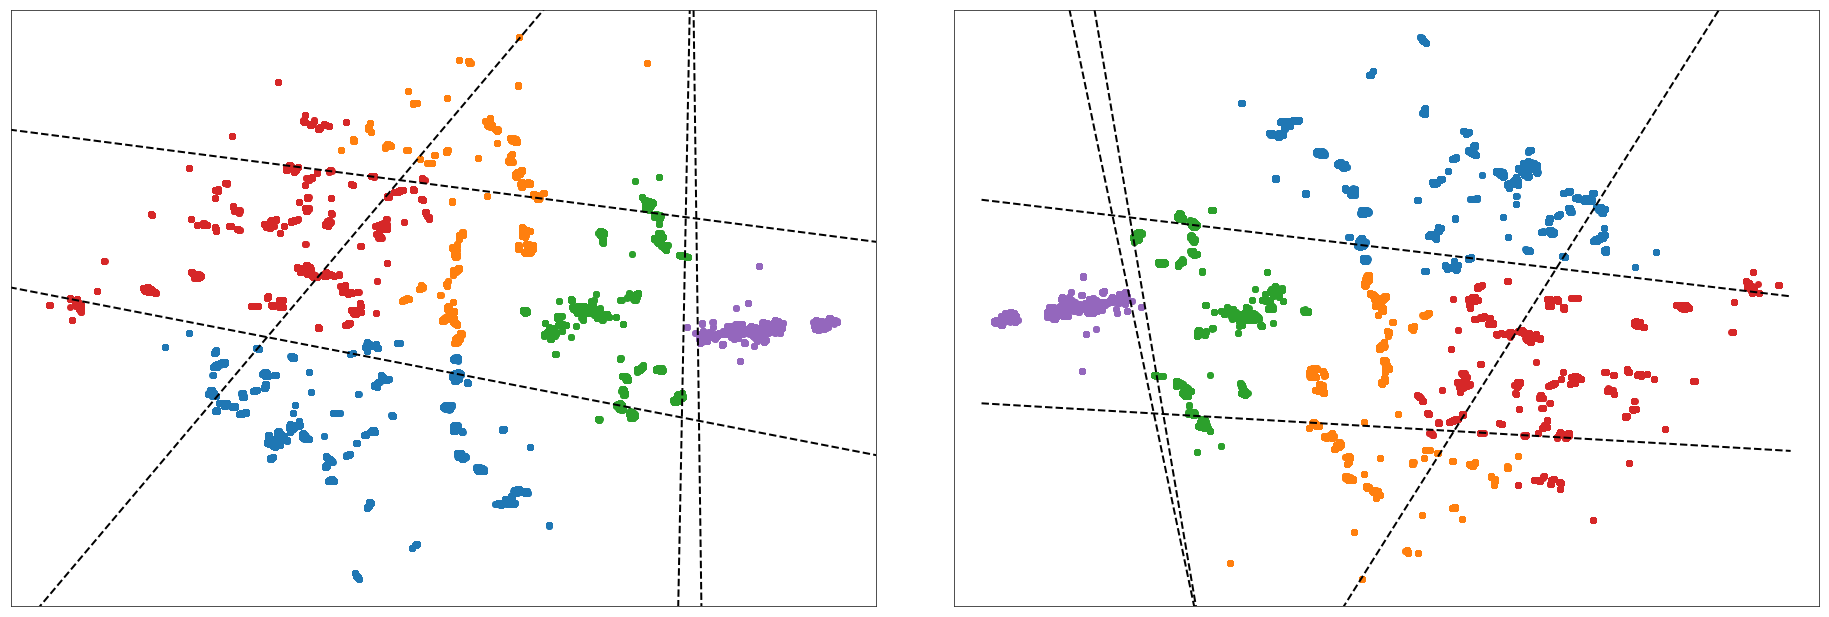

In [36]:
for name, algorithm in [clustering_algorithms[3]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values) 

### Clustering Metrics

In [37]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by Birch for n_clusters 5
n_clusters orignial 5
n_clusters detected 5
n unclustered points 0 out of 97200
Clustering using Birch, time elapesd 2.470867156982422
Clustering Accuracy 0.4299794238683128
Clustering purity 0.43349794238683126
Clustering homogeneity 0.2737265406493173
Clustering adjusted_rand_score 0.20816139251330454
Clustering adjusted_mutual_info_score 0.27368939534962217
Clustering completeness_score 0.2847878245749263
Clustering v_measure_score 0.2791476491697422


## Gaussian Mixture

In [38]:
import time
for name, algorithm in [clustering_algorithms[4]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting GaussianMixture


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.6387962962962963
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.6389300411522634


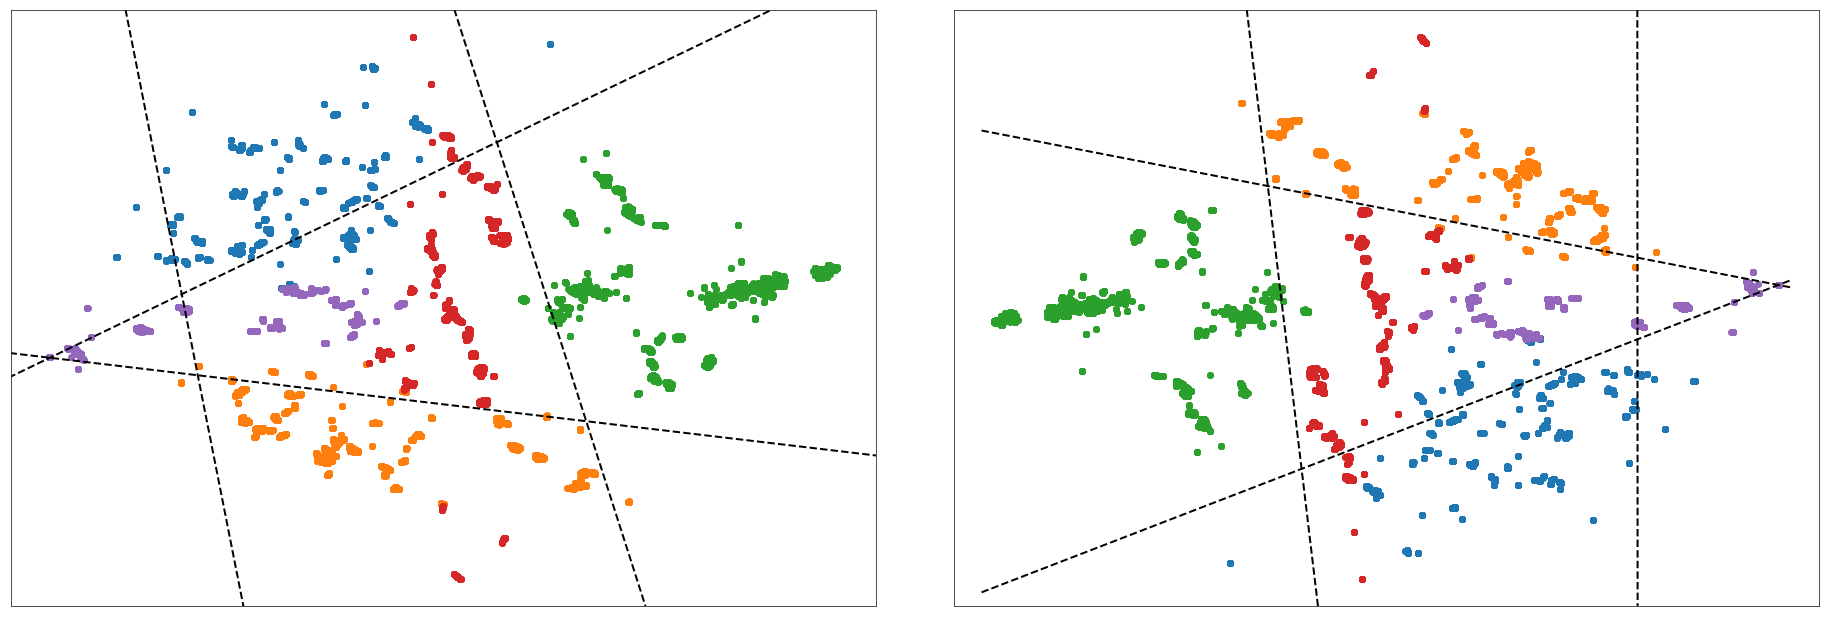

In [39]:
for name, algorithm in [clustering_algorithms[4]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)
    

### Clustering Metrics

In [40]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by GaussianMixture for n_clusters 5
n_clusters orignial 5
n_clusters detected 5
n unclustered points 0 out of 97200
Clustering using GaussianMixture, time elapesd 1.819948673248291
Clustering Accuracy 0.5475205761316873
Clustering purity 0.5498559670781893
Clustering homogeneity 0.33914660740049823
Clustering adjusted_rand_score 0.2685443331090282
Clustering adjusted_mutual_info_score 0.33911280819234274
Clustering completeness_score 0.34767967513514875
Clustering v_measure_score 0.3433601342361943


## DBSCAN

In [41]:
import time
for name, algorithm in [clustering_algorithms[5]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting DBSCAN


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.004331275720164609
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.005113168724279835


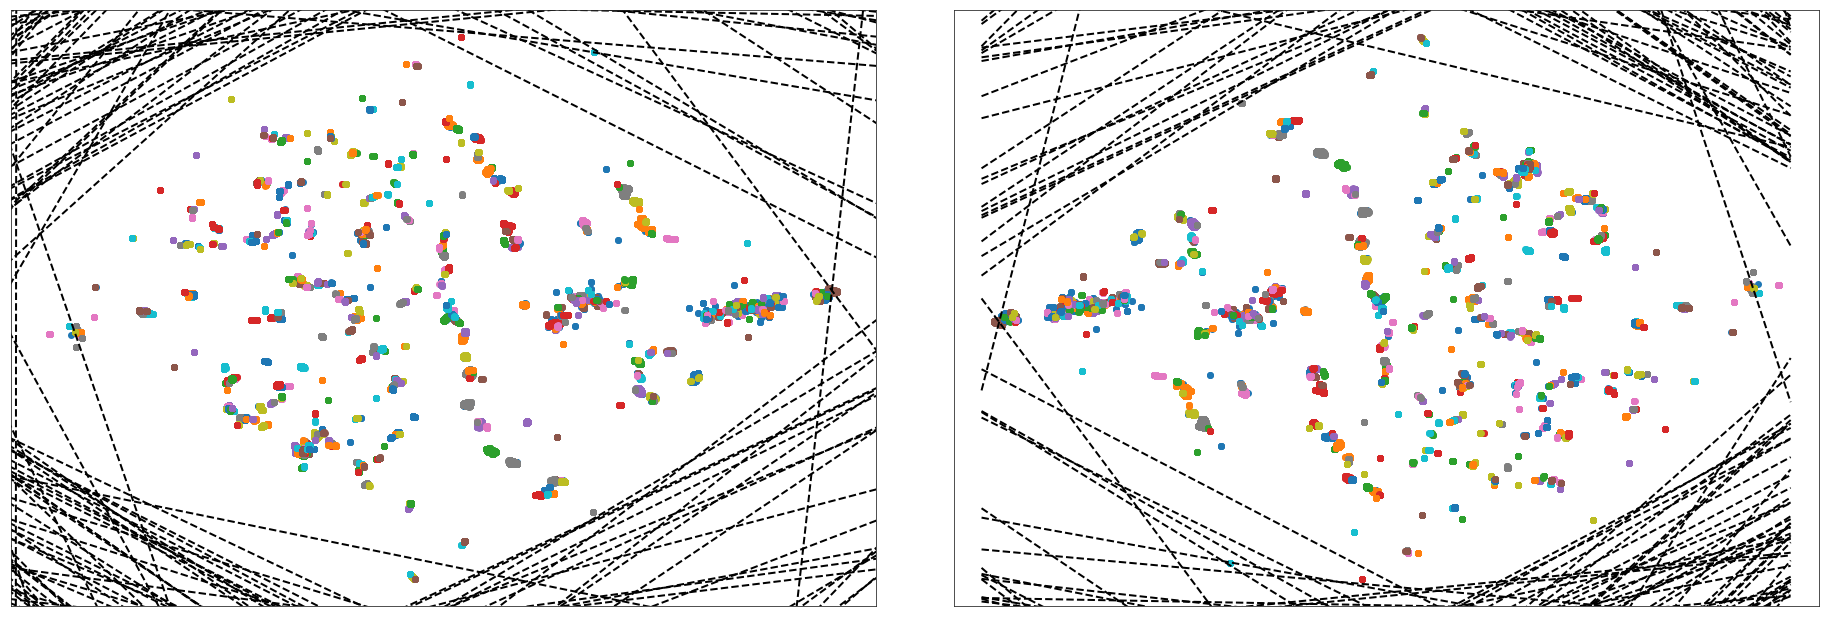

In [42]:
for name, algorithm in [clustering_algorithms[5]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)

### Clustering Metrics

In [43]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by DBSCAN for n_clusters 5
n_clusters orignial 5
n_clusters detected 675
n unclustered points 748 out of 97200
Clustering using DBSCAN, time elapesd 0.8217411041259766
Clustering Accuracy 0.047505494961224234
Clustering purity 0.8885041264048439
Clustering homogeneity 0.8640840410774985
Clustering adjusted_rand_score 0.029189325048387692
Clustering adjusted_mutual_info_score 0.24224050237028819
Clustering completeness_score 0.2442337326508773
Clustering v_measure_score 0.38082664679549266


## HDBSCAN

In [44]:
import time
for name, algorithm in [clustering_algorithms[6]]:
    t0 = time.time()
    
    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting HDBSCAN


C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.0072839506172839505
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.009393004115226337


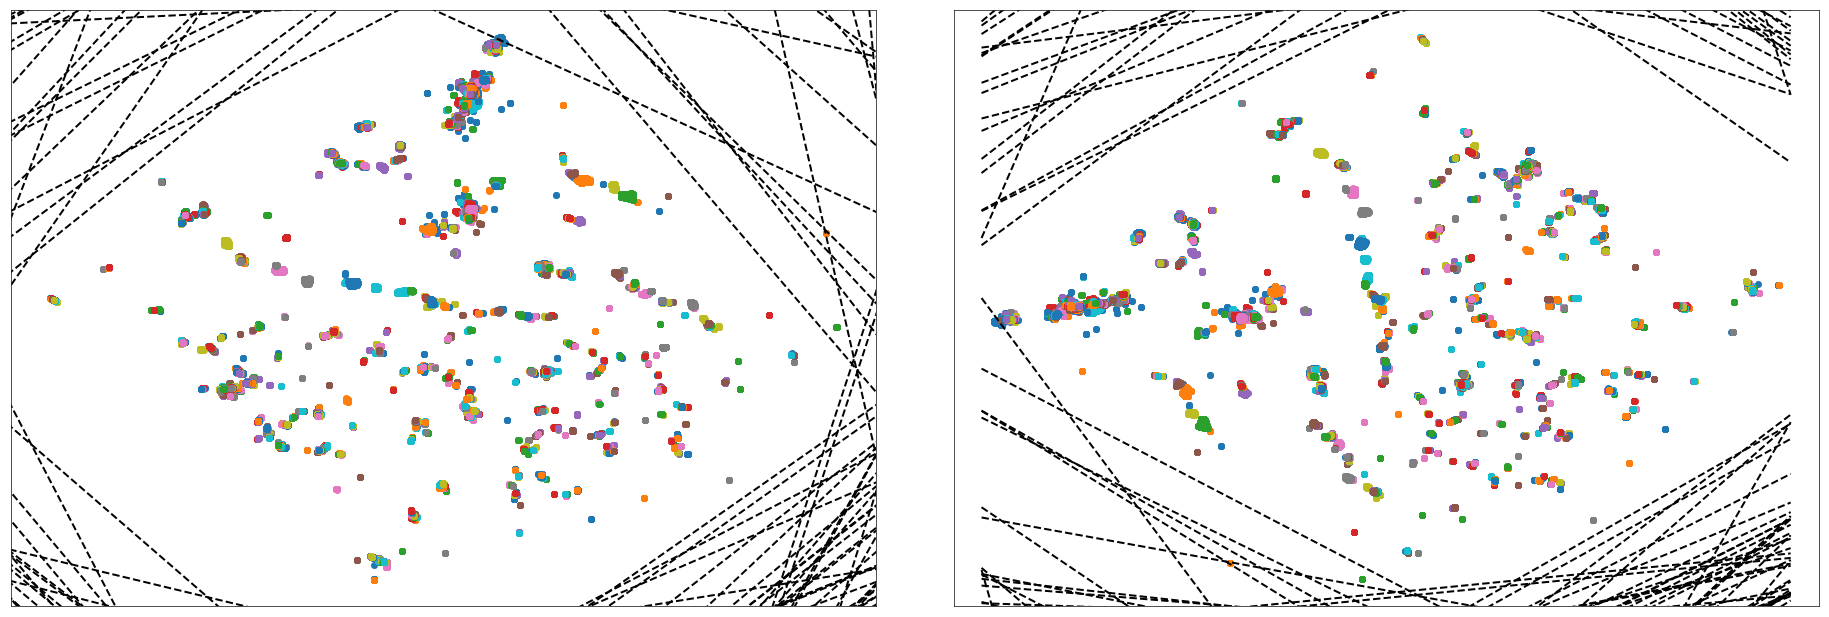

In [45]:
for name, algorithm in [clustering_algorithms[6]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)
    

### Clustering Metrics

In [46]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by HDBSCAN for n_clusters 5
n_clusters orignial 5
n_clusters detected 2005
n unclustered points 10095 out of 97200
Clustering using HDBSCAN, time elapesd 5.351029634475708
Clustering Accuracy 0.04745996211468917
Clustering purity 0.9177659147006486
Clustering homogeneity 0.898041248312065
Clustering adjusted_rand_score 0.022322458430942906
Clustering adjusted_mutual_info_score 0.21536714036959084
Clustering completeness_score 0.22154604593979407
Clustering v_measure_score 0.35541219282472114


# Choose number of clusters equals to Harmonic Mean of STD

In [47]:
from scipy.stats import hmean
n_clusters = int(hmean(X.reshape((X.shape[0], -1)).std(axis=1))*255)

In [48]:

# estimate bandwidth for mean shift
from sklearn import cluster, mixture
import hdbscan

from sklearn.neighbors import kneighbors_graph
# connectivity matrix for structured Ward
connectivity = kneighbors_graph(Z_embedded, n_neighbors=n_clusters, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
two_means = cluster.MiniBatchKMeans(n_clusters=n_clusters)
ward = cluster.AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=connectivity)
spectral = cluster.SpectralClustering(n_clusters=n_clusters, eigen_solver='arpack', affinity="nearest_neighbors")
dbscan = cluster.DBSCAN(eps=0.2)
affinity_propagation = cluster.AffinityPropagation()
birch = cluster.Birch(n_clusters=n_clusters)
gmm = mixture.GaussianMixture(n_components=n_clusters, covariance_type='full')
hdbscan_ = hdbscan.HDBSCAN(min_cluster_size=n_clusters, gen_min_span_tree=False)

clustering_algorithms = (
    ('MiniBatchKMeans', two_means),
    ('SpectralClustering', spectral),
    ('Ward', ward),
    ('Birch', birch),
    ('GaussianMixture', gmm),
    ('DBSCAN', dbscan),
    ('HDBSCAN', hdbscan_)
)


## MiniBatch KMeans

In [49]:
import time
for name, algorithm in [clustering_algorithms[0]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting MiniBatchKMeans


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.0712037037037037
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.07140946502057613


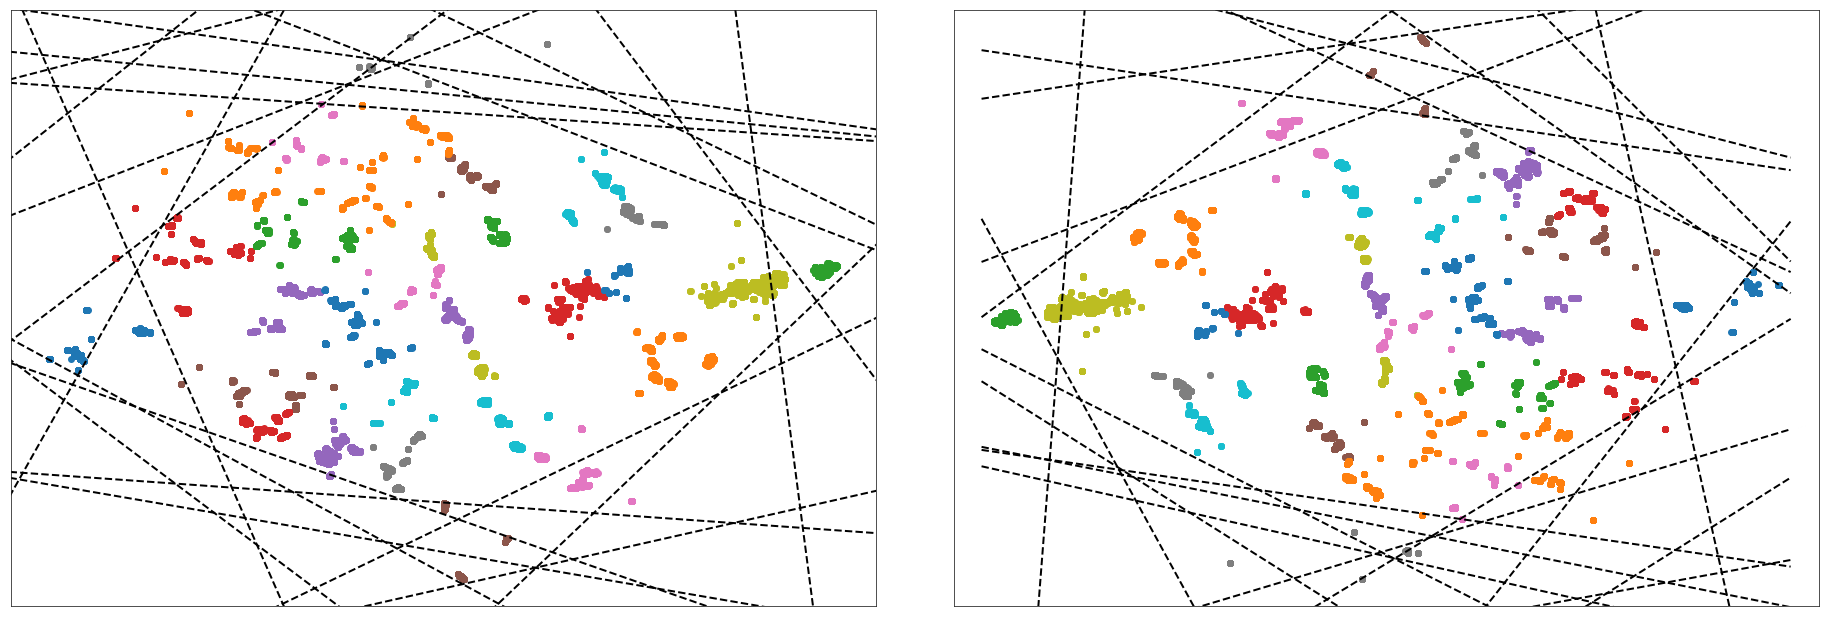

In [50]:
for name, algorithm in [clustering_algorithms[0]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values) 

### Clustering Metrics

In [51]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by MiniBatchKMeans for n_clusters 32
n_clusters orignial 5
n_clusters detected 32
n unclustered points 0 out of 97200
Clustering using MiniBatchKMeans, time elapesd 0.5802617073059082
Clustering Accuracy 0.17003086419753086
Clustering purity 0.6922119341563786
Clustering homogeneity 0.6348071323450012
Clustering adjusted_rand_score 0.13183624777581696
Clustering adjusted_mutual_info_score 0.3014914022471221
Clustering completeness_score 0.3016229927273865
Clustering v_measure_score 0.40894119472670365


## Spectral Clustering

In [52]:
import time
for name, algorithm in [clustering_algorithms[1]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting SpectralClustering


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.0294238683127572
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.0294238683127572


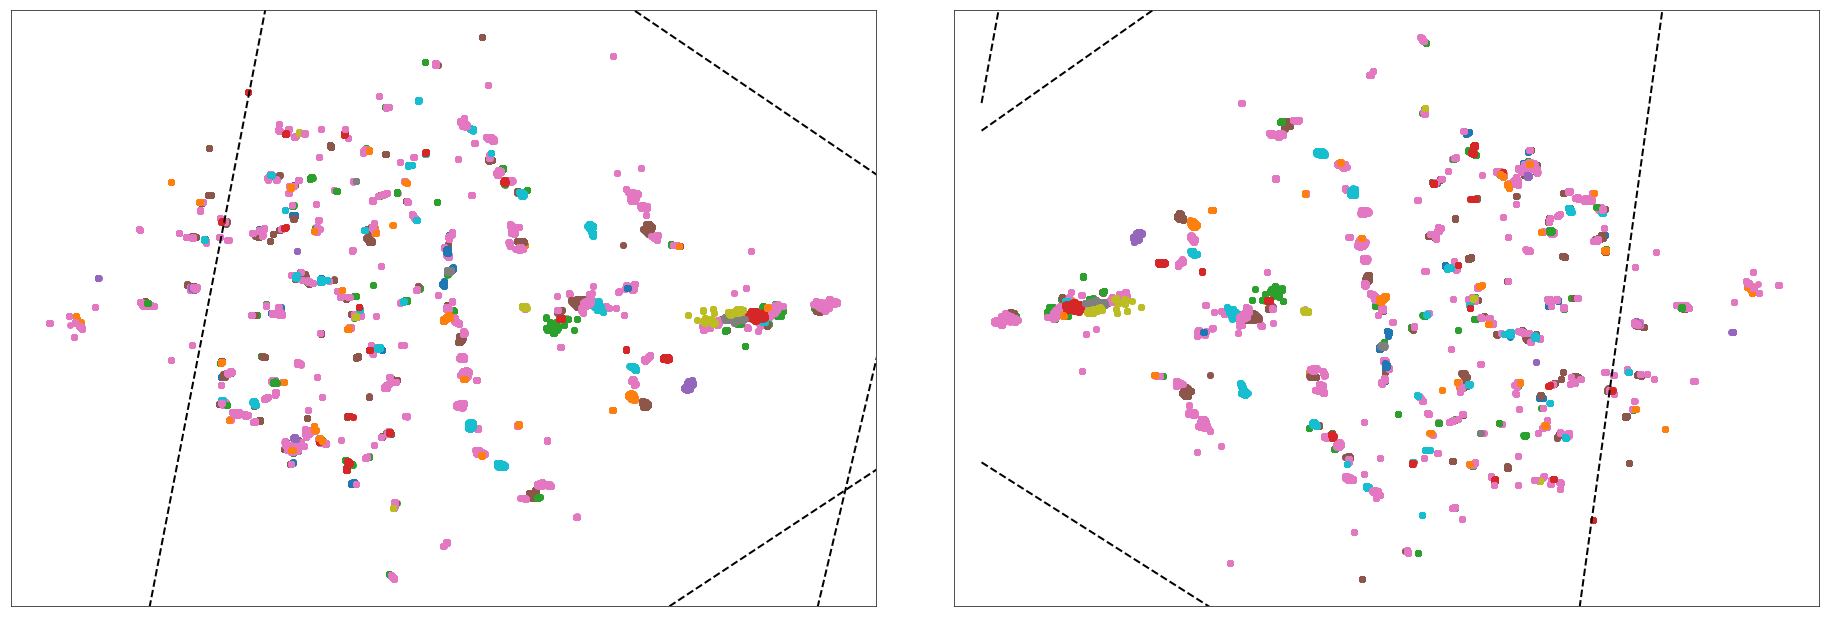

In [53]:
for name, algorithm in [clustering_algorithms[1]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)

### Clustering Metrics

In [54]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by SpectralClustering for n_clusters 32
n_clusters orignial 5
n_clusters detected 32
n unclustered points 0 out of 97200
Clustering using SpectralClustering, time elapesd 1177.9840695858002
Clustering Accuracy 0.1955761316872428
Clustering purity 0.3319238683127572
Clustering homogeneity 0.11309108725515599
Clustering adjusted_rand_score 0.012106737647911857
Clustering adjusted_mutual_info_score 0.08155202620258732
Clustering completeness_score 0.08182402016091879
Clustering v_measure_score 0.09494971966265313


## Ward

In [55]:
import time
for name, algorithm in [clustering_algorithms[2]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting Ward


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.048559670781893
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.04703703703703704


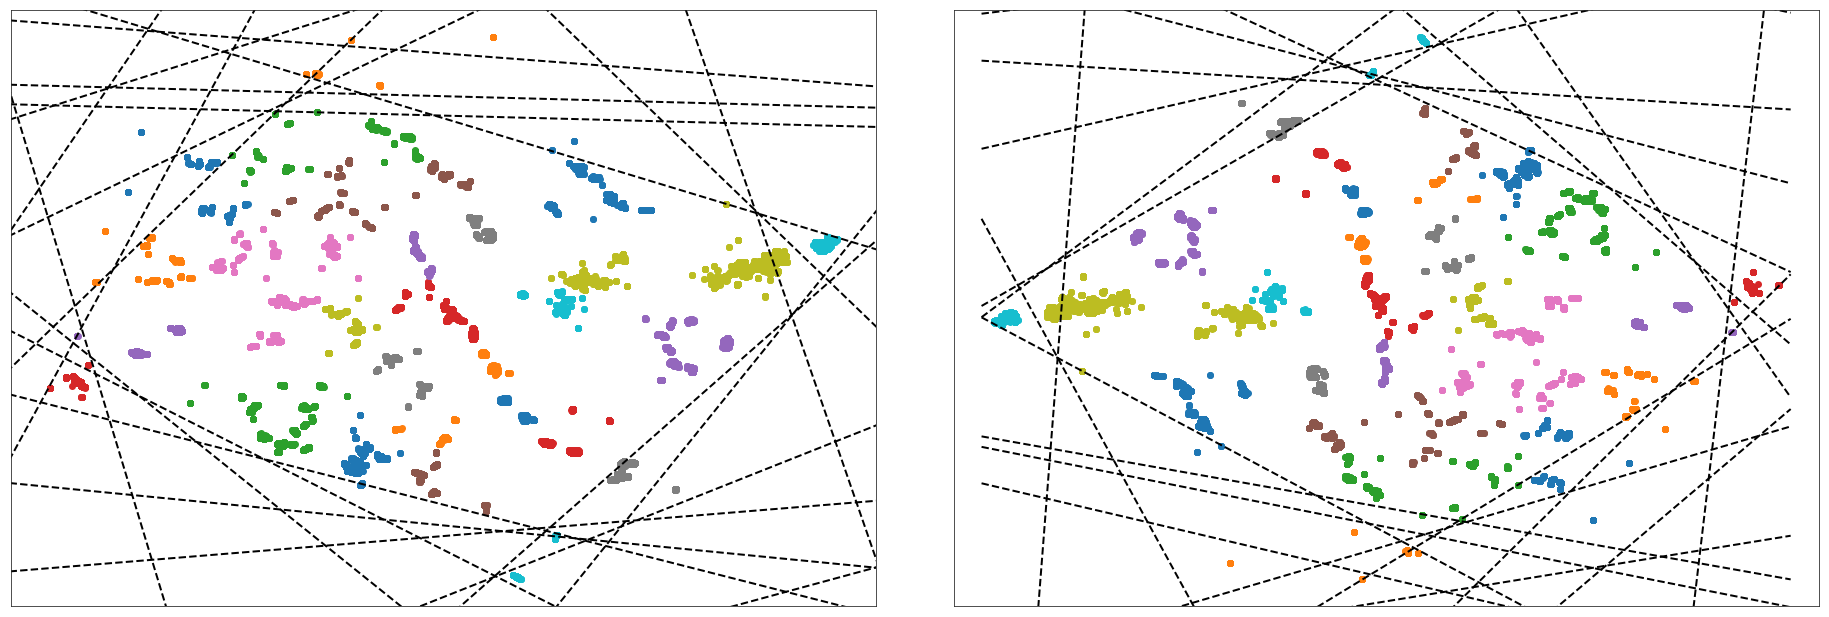

In [56]:
for name, algorithm in [clustering_algorithms[2]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)

### Clustering Metrics

In [57]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by Ward for n_clusters 32
n_clusters orignial 5
n_clusters detected 32
n unclustered points 0 out of 97200
Clustering using Ward, time elapesd 74.3346860408783
Clustering Accuracy 0.18436213991769548
Clustering purity 0.7031687242798353
Clustering homogeneity 0.6638099426731525
Clustering adjusted_rand_score 0.1494497520120949
Clustering adjusted_mutual_info_score 0.31678606356353933
Clustering completeness_score 0.31691539219344506
Clustering v_measure_score 0.4290122439893653


## Birch

In [58]:
import time
for name, algorithm in [clustering_algorithms[3]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting Birch


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.05099794238683127
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.0508641975308642


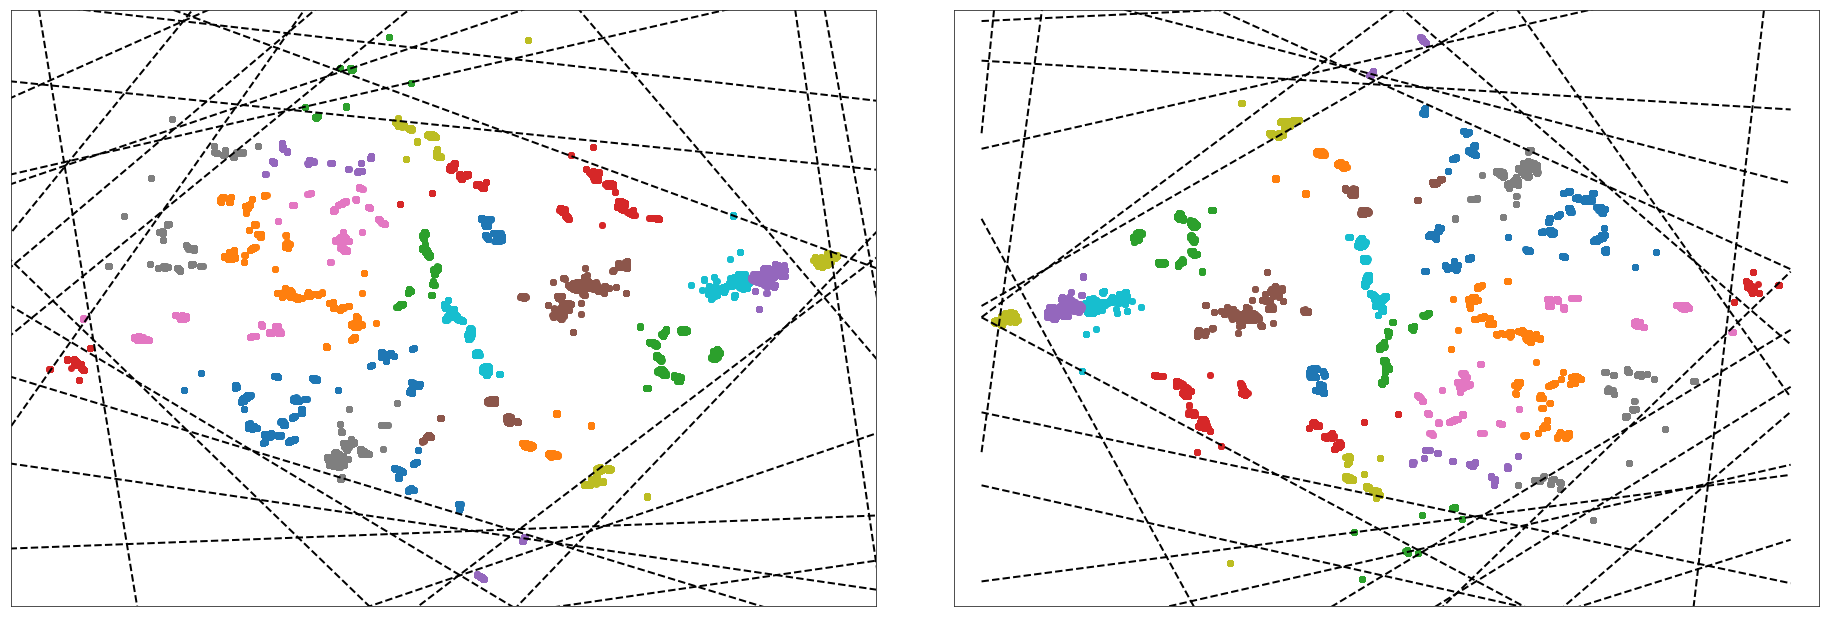

In [59]:
for name, algorithm in [clustering_algorithms[3]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values) 

### Clustering Metrics

In [60]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by Birch for n_clusters 32
n_clusters orignial 5
n_clusters detected 32
n unclustered points 0 out of 97200
Clustering using Birch, time elapesd 2.5021004676818848
Clustering Accuracy 0.1917901234567901
Clustering purity 0.6970679012345679
Clustering homogeneity 0.6409966905329174
Clustering adjusted_rand_score 0.14623292721330516
Clustering adjusted_mutual_info_score 0.30521789127110266
Clustering completeness_score 0.3053491181868344
Clustering v_measure_score 0.413649582238215


## Gaussian Mixture

In [61]:
import time
for name, algorithm in [clustering_algorithms[4]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting GaussianMixture


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.10467078189300412
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.1045679012345679


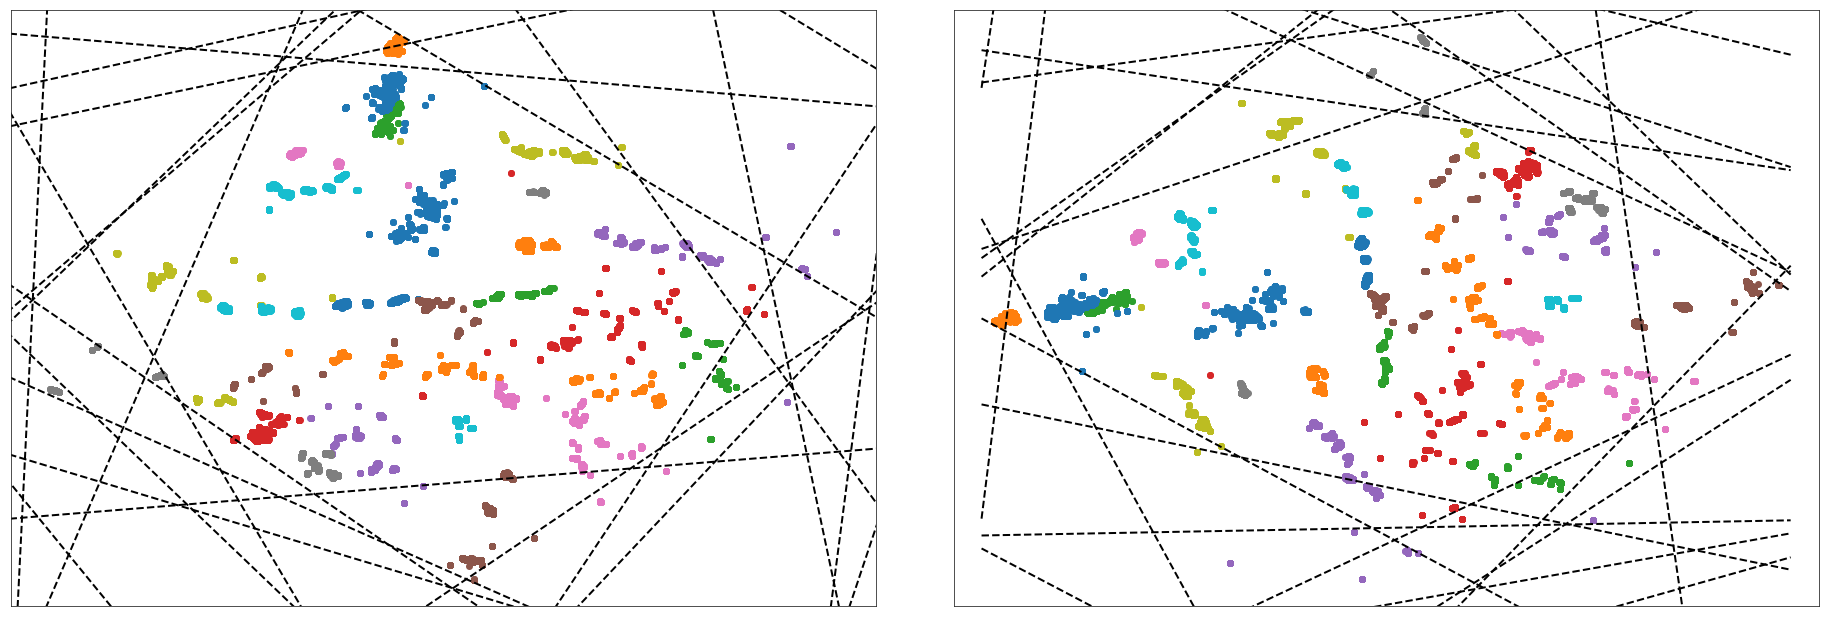

In [62]:
for name, algorithm in [clustering_algorithms[4]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values) 

### Clustering Metrics

In [63]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by GaussianMixture for n_clusters 32
n_clusters orignial 5
n_clusters detected 32
n unclustered points 0 out of 97200
Clustering using GaussianMixture, time elapesd 9.51982593536377
Clustering Accuracy 0.20584362139917695
Clustering purity 0.7255246913580247
Clustering homogeneity 0.6602003767774332
Clustering adjusted_rand_score 0.1549744108870493
Clustering adjusted_mutual_info_score 0.3146548654072409
Clustering completeness_score 0.3147844289935931
Clustering v_measure_score 0.42630571757657876


## DBSCAN

In [64]:
import time
for name, algorithm in [clustering_algorithms[5]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting DBSCAN


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.004331275720164609
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.005113168724279835


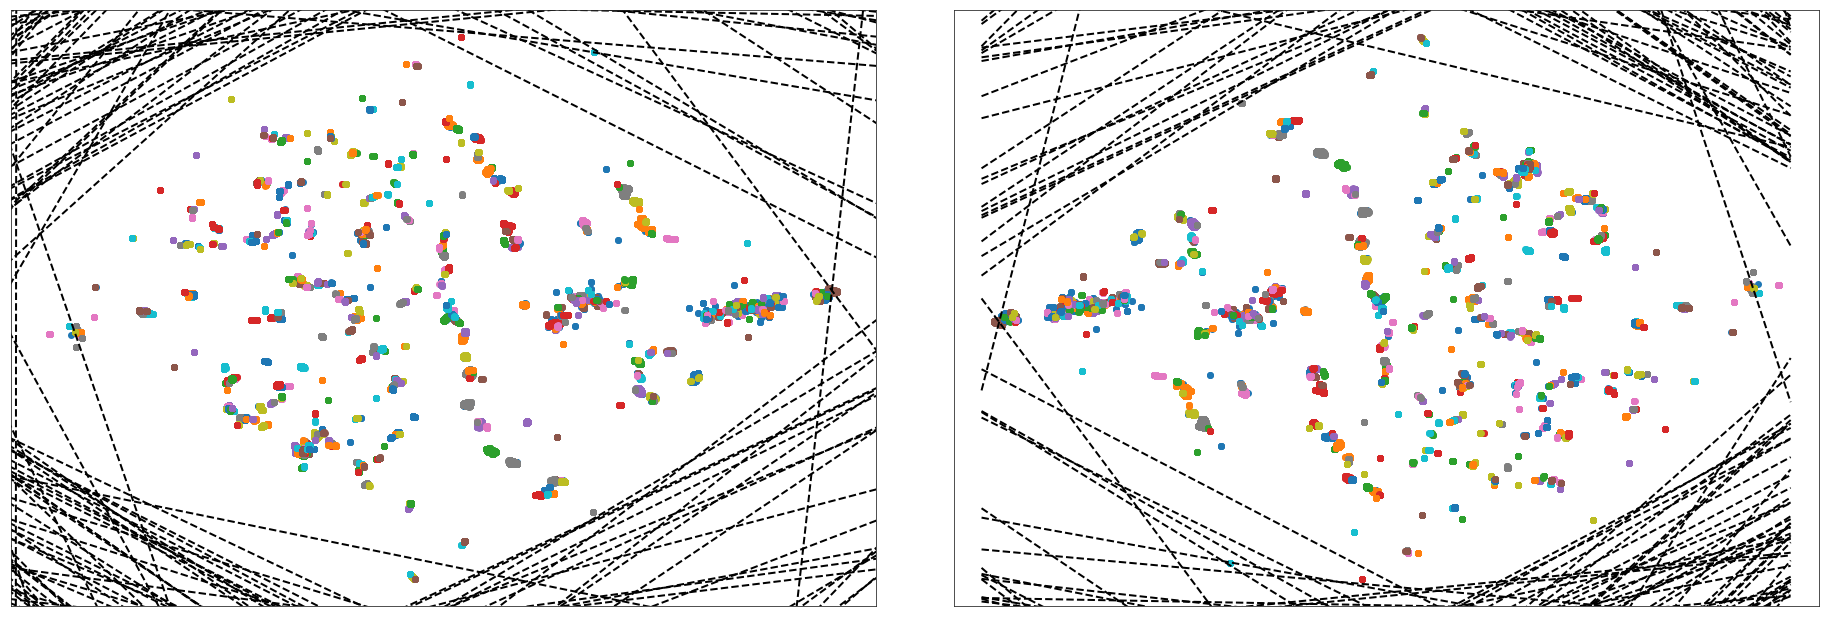

In [65]:
for name, algorithm in [clustering_algorithms[5]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values) 

### Clustering Metrics

In [66]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by DBSCAN for n_clusters 32
n_clusters orignial 5
n_clusters detected 675
n unclustered points 748 out of 97200
Clustering using DBSCAN, time elapesd 0.8491880893707275
Clustering Accuracy 0.047505494961224234
Clustering purity 0.8885041264048439
Clustering homogeneity 0.8640840410774985
Clustering adjusted_rand_score 0.029189325048387692
Clustering adjusted_mutual_info_score 0.24224050237028819
Clustering completeness_score 0.2442337326508773
Clustering v_measure_score 0.38082664679549266


## HDBSCAN

In [67]:
import time
for name, algorithm in [clustering_algorithms[6]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting HDBSCAN


C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.007314814814814815
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.009444444444444445


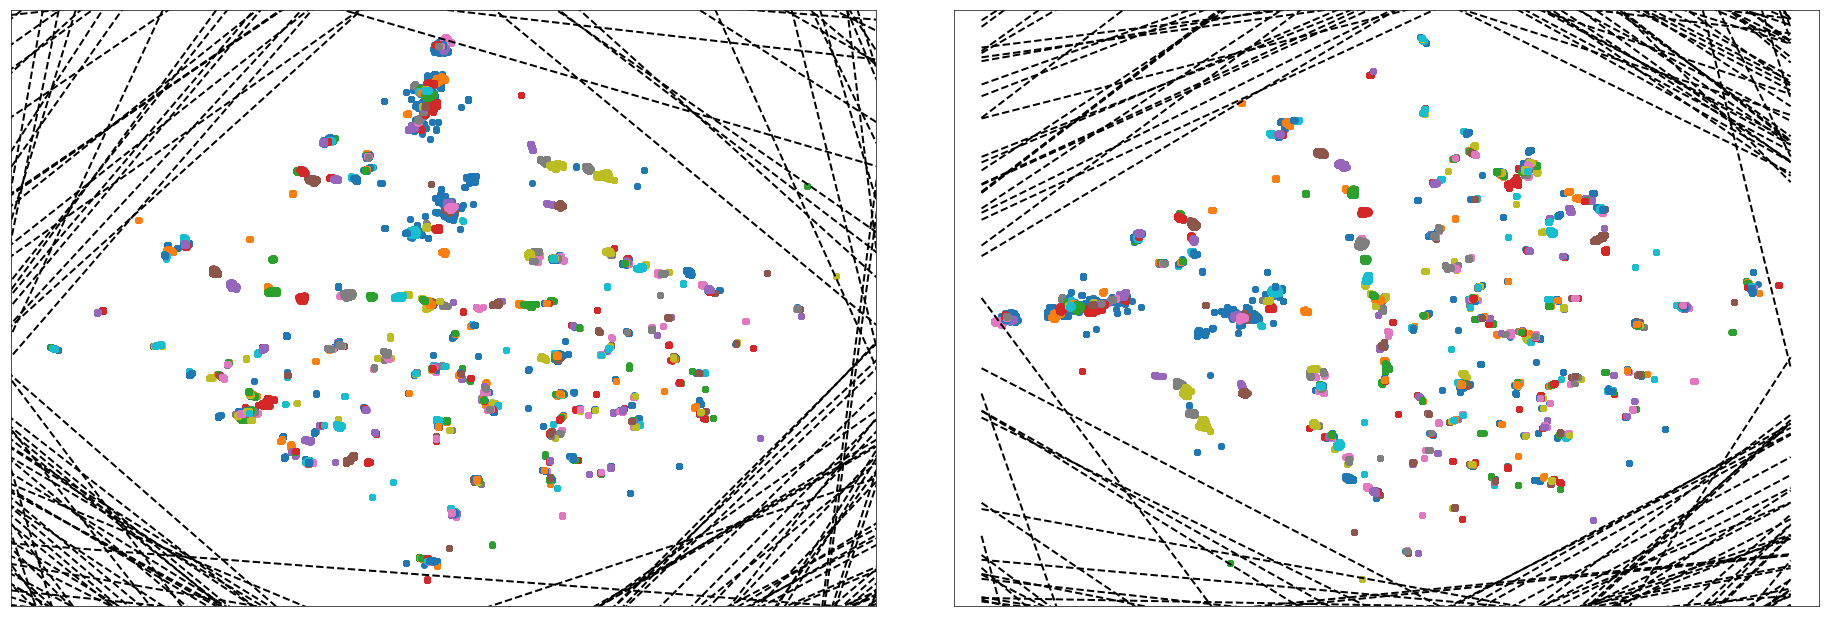

In [68]:
for name, algorithm in [clustering_algorithms[6]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values) 

### Clustering Metrics

In [69]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by HDBSCAN for n_clusters 32
n_clusters orignial 5
n_clusters detected 500
n unclustered points 5336 out of 97200
Clustering using HDBSCAN, time elapesd 5.183951377868652
Clustering Accuracy 0.04752677871636332
Clustering purity 0.8879103892710964
Clustering homogeneity 0.8602661530594802
Clustering adjusted_rand_score 0.02925261673768882
Clustering adjusted_mutual_info_score 0.2404663734942843
Clustering completeness_score 0.2419221273703472
Clustering v_measure_score 0.3776440405838707


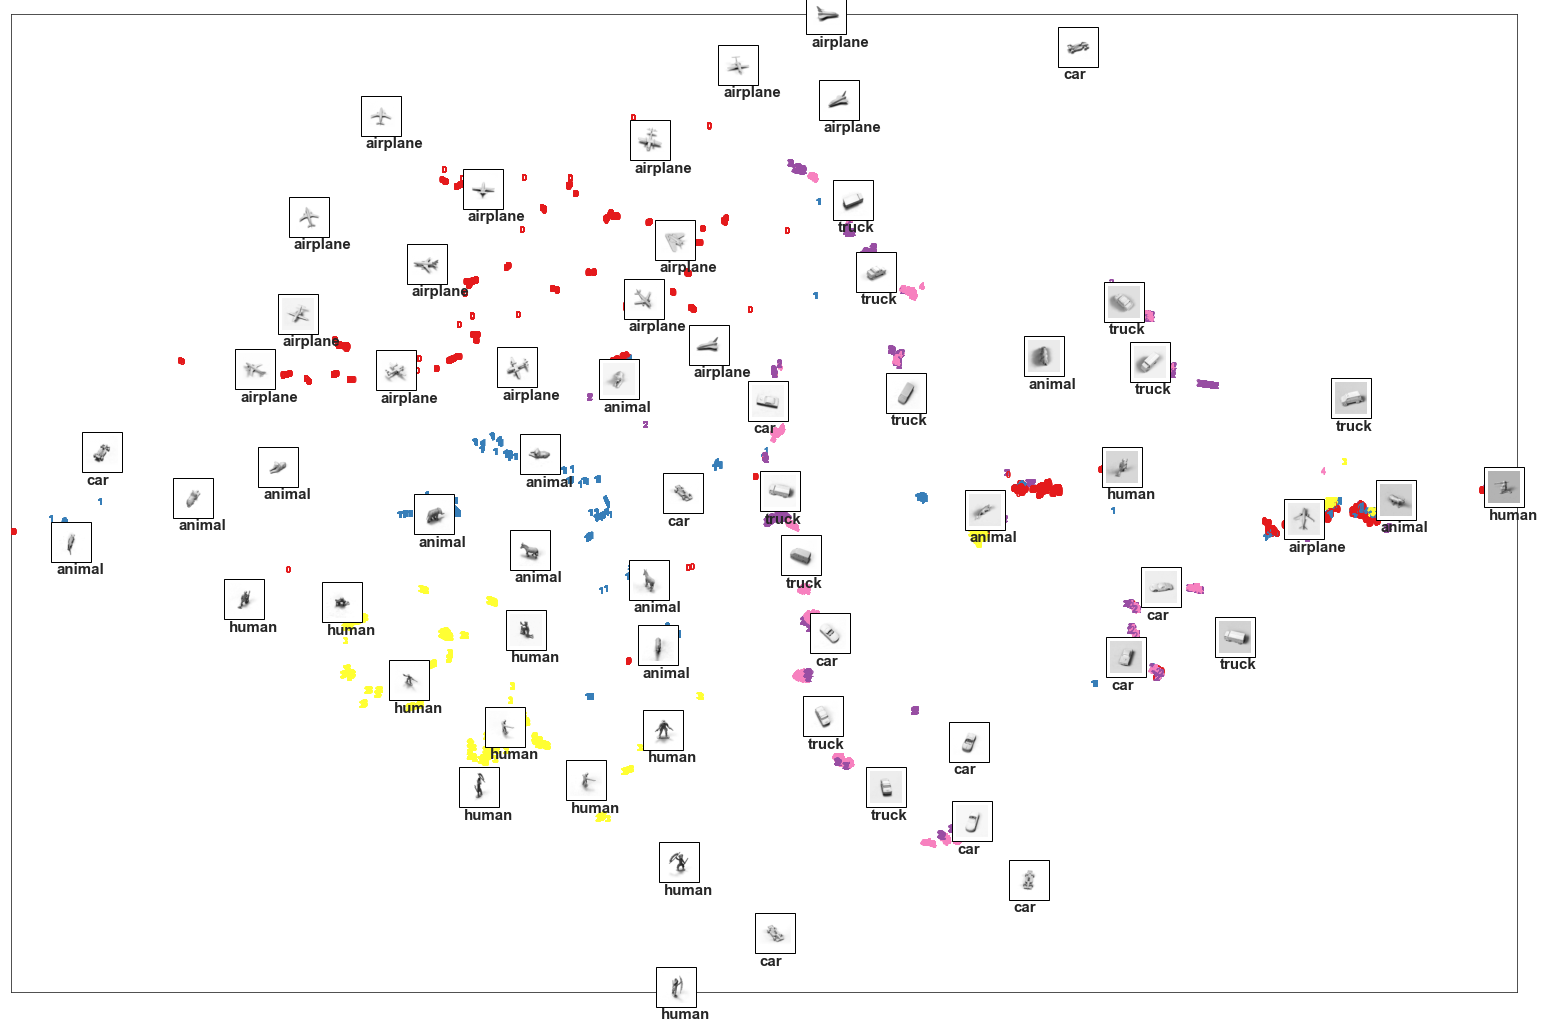

In [70]:
plot_dataset(Z_embedded[y_pred!=-1], y[y_pred!=-1],images=imgs[y_pred!=-1], labels=labels)

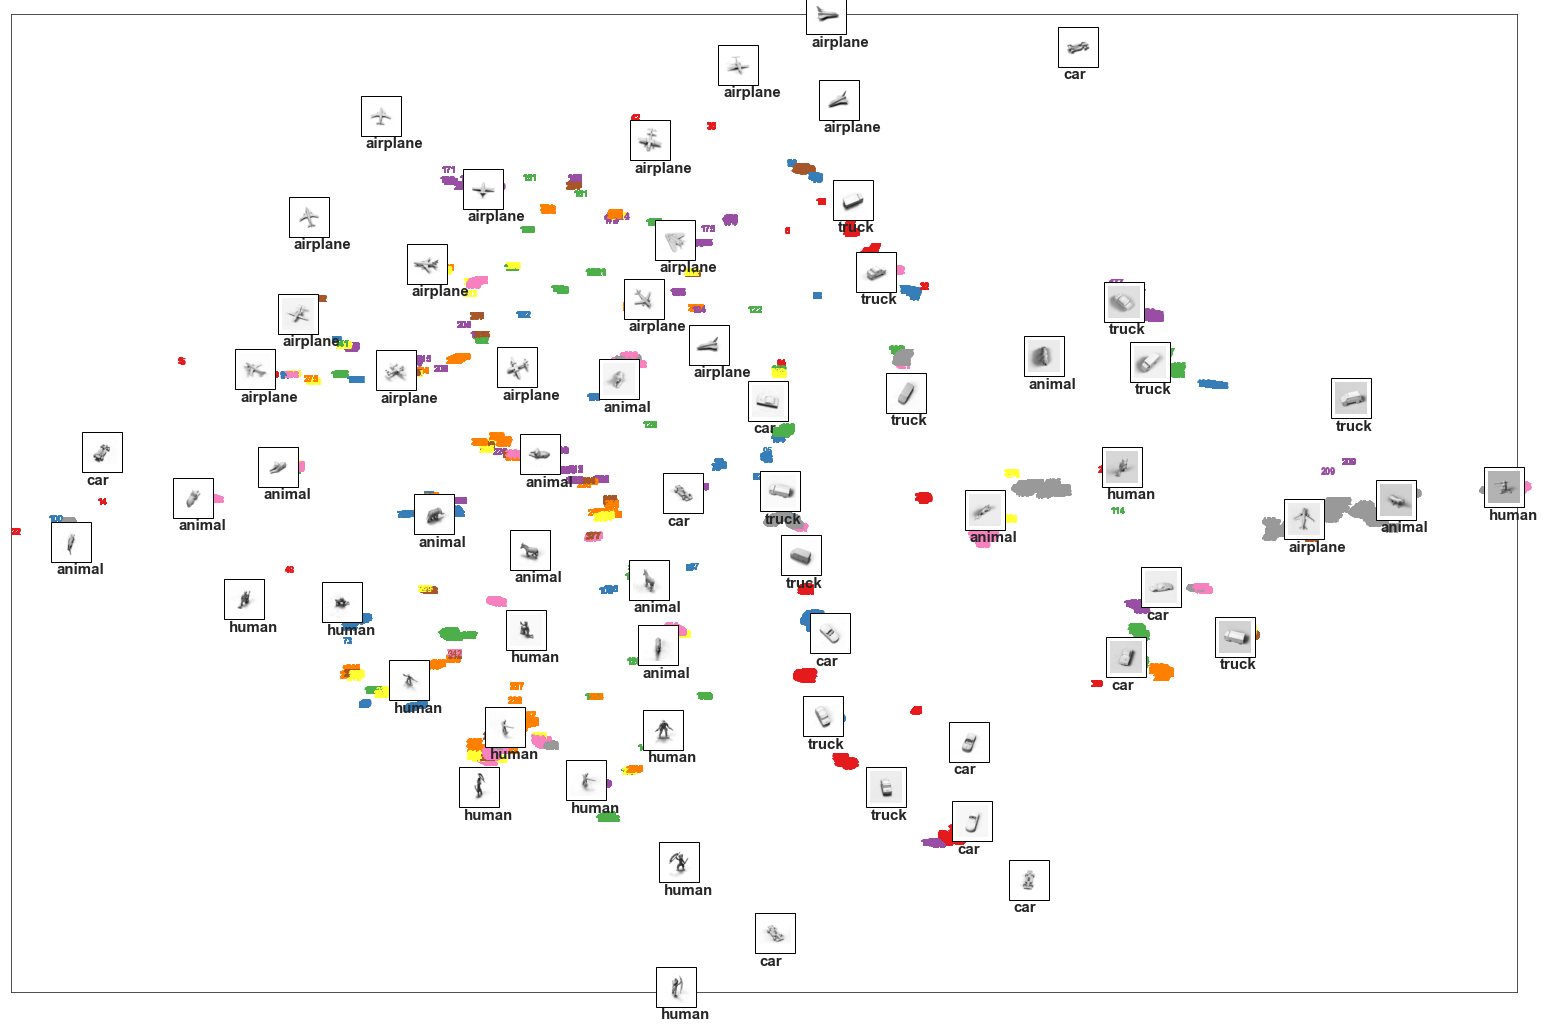

In [72]:
plot_dataset(Z_embedded[y_pred!=-1], y_pred[y_pred!=-1],images=imgs[y_pred!=-1], y_original=y[y_pred!=-1], labels=labels)

cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.0121483932770182
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.012191935905251241


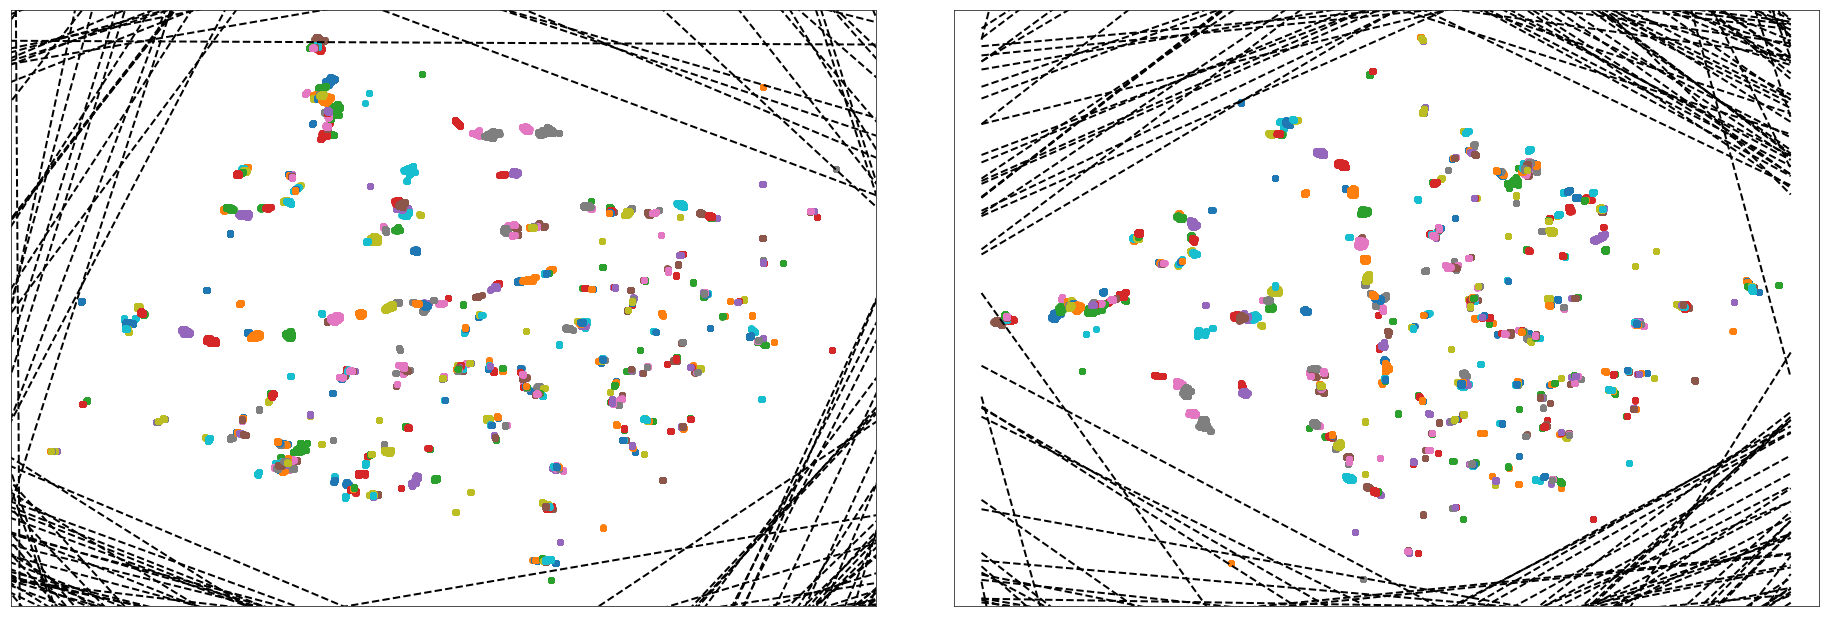

In [73]:
plot_transform_hyperplanes(Z_embedded[y_pred!=-1], pd.get_dummies(y_pred[y_pred!=-1]).values)

In [74]:
embedding_Z_space = {'X': X[y_pred!=-1], 'Z': Z_embedded[y_pred!=-1], 'y_cluster': y_pred[y_pred!=-1]} 

In [55]:
import pickle
with open('./experiments/manifold generation/{}_{}.pkl'.format(dataset_name, name), 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(embedding_Z_space, f, pickle.HIGHEST_PROTOCOL)
    